<div style="float:left">
    <h1 style="width:600px">Assessment</h1>
    <h3 style="width:600px">CASA0006: Data Science for Spatial Systems</h3>
    <h3 style="width:600px">Author: Andres Restrepo</h3>

</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

MSc Urban Spatial Science<br>
Centre for Advanced Spatial Analysis CASA<br>
University College London UCL

Notebook available in: [Github Repo](https://github.com/rpoandres/DSSS_Municipality_Clustering.git)

### Size and execution time notice

**1. Pre-processing:** As the non-spatial raw data required in this research exceed the 100 megabyte limit and the download might endanger the successful execution of the notebook, the initial input of the code will be already pre-processed data. The notebook contains the code used for the cleaning and pre-processing in case future reproduction. Regarding the spatial data, there is no issue with it and it will be reading locally.

**2. Time of execution: As the spatial clustering sections includes 6 scenarios when running the max-p method (1102 polygons), that section alone needs around 12 minutes to execute (16 GB RAM, Windows 11).

### Requered libraries

In [1]:
# Execution time measure
import timeit
start_time = timeit.default_timer()

#Preprocesing and visualizing
import os
import urllib.request
from urllib.request import urlopen
import zipfile
import geopandas as gpd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#Clustering
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram
import spopt
from spopt.region import MaxPHeuristic as MaxP
import libpysal
import warnings
import contextily
import esda

from IPython.display import Image
from IPython.core.display import HTML 

# Introduction

This research presents a proposal for analysing and clustering territorial entities in Colombia, South America at a municipality level to comprehend their heterogeneity and homogeneity from both a non-spatial and spatial perspective.


At a political and administrative level, Colombia is divided 33 state or department territorial entities (DANE, 2021). Each department consists of a group of adjacent municipalities. There is a total of 1.121municipal level entities, however, from which 1102 are truly considered municipalities, 1 insular and 18 continental non-municipalized territories (DANE, 2021).


Using non-spatial and the municipality spatial structure, there are multiple possible and cohesive department clusters that might better reflect and point out relevant shared attributes from the Colombian territory. Finding new possible municipality clusters, is a high valuable asset when formulating decentralized public policy and business initiatives that aim to address this local attributes more accurately.


# Literature review

As an initiative from the government, the Colombian National Planning Department (DNP) has conducted municipalities classification exercises related the rurality and typology. Although this research does not aim to replicate or contrast this rural and municipality typology clustering exercises, they do provide valuable references in the matter.


In the rurality case, using population density and the proportion of rural and urban population, the municipalities were classified in the following categories (Andrés et al., 2015):
1. Cities and agglomerations.
2. Intermediates.
3. Rural.
4. Dispersed rural.


Regarding the municipality topology (Sanchez, González and Villamil, 2015), using PCA  on 18 variable of 6 dimensions (Urban Regional (5), Living Conditions (1), Economic Development (4), Environmental (2), Institutional (2) and Security (4), the municipalities were grouped in 3 categories:
1. Robust development.
2. Intermediate development.
3. Incipient development.


Important to note that these previous references do not account for the spatial structure and connectivity as this research intents to.


# Research question

The aim of this research is to formulate an alternative municipality administrative division using socio-economic and geographic data.


- How could the municipalities be alternatively clustered using socio-economic and geographic data?
- Is there a more municipality cohesive department level division that better reflect the spatial structure and socio-economic attributes of the Colombian territory?


Colombia is a highly diverse country from multiple perspectives. Either from a economic and social view (Sánchez and Núñez’, 2000), agricultural productive process (Gáfaro and Pellegrina, 2022) or a (uneven) geographically outlook (Duranton, 2015) cited by (Gáfaro and Pellegrina, 2022), this significant heterogeneity might come as a challenge when formulating business initiatives and public policies at regional or local level.


By addressing the research question, this study aims to contribute to have a deeper understanding of both similarities and differences that municipalities in Colombia have, including the regional cohesion that may result from neighbouring municipalities.


# Data

The information sources for this research are the followings:

1- Terridata: It is a compilation of multiple official data sources gathered, cured, cleaned, and structured by the National Planning Department (DNP) or Colombia. The Terridata dataset includes multiple data dimensions and indicators in a multitemporal yearly and monthly time frame for every municipality, department and at the national level.

Terridata download webpage: [Terridata download web page](https://terridata.dnp.gov.co/index-app.html#/descargas)


Terridata raw data: [Raw Terridata data](https://terridata.dnp.gov.co/assets/docs/txt/dimensiones/TerriData.txt.zip)

2- Spatial data: It includes shapes of the municipality entities Colombia and the state level administrative groupings. The spatial information is generated by the National Administrative Statistics Department (DANE).

DANE Spatial data:  [DANE download web page](https://geoportal.dane.gov.co/servicios/descarga-y-metadatos/descarga-mgn-marco-geoestadistico-nacional/p)


## Reading

In [2]:
# In the next section, the spatial and non-spatial data will be read locally. In the case of the pre-processed version of the non-spatial data, this will be done later in section: **5.2.4.4. Read pre-processed data.** -->

### Terridata

In [3]:
# %%time
# with zipfile.ZipFile('Data/Terri_data/TerriData.txt.zip', 'r') as zip_file:
#     with zip_file.open('TerriData.txt') as file:
#         # read the text file into a pandas dataframe
#         raw_df = pd.read_csv(file, sep = '|', thousands='.' ,decimal=',',header = None, encoding='utf-16',dtype=({0:str,2:str, 4:'category',5:'category'}),low_memory=False)

In [4]:
# # Raw data reading
# raw_df.head()

In [5]:
# # Renaming of columns
# raw_df = raw_df.rename(columns={0: 'dep_code',
#                         1: 'dep',
#                         2: 'mun_code',
#                         3: 'mun',
#                         4: 'dim',
#                         5: 'subcat',
#                         6: 'indicador',
#                         7: 'indicador_code',
#                         8: 'num_data',
#                         9: 'qua_data',
#                         10: 'year',
#                         11: 'month',
#                         12: 'source',
#                         13: 'units'})

In [6]:
# raw_df.head()

In [7]:
# raw_df.info()

In [8]:
# # Creationg a control copy of the raw data
# raw_df_control = raw_df.copy()

### Spatial Data

In [9]:
# Reading spatial data from local
dep_geo = gpd.read_file('Data/Spatial/MGN2021_DPTO_POLITICO/MGN_DPTO_POLITICO.shp')
mun_geo = gpd.read_file('Data/Spatial/MGN2021_MPIO_POLITICO/MGN_MPIO_POLITICO.shp')

#### Departments spatial data

In [10]:
#Reviewing data type
dep_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DPTO_CCDGO  33 non-null     object  
 1   DPTO_CNMBR  33 non-null     object  
 2   DPTO_ANO_C  33 non-null     int64   
 3   DPTO_ACT_A  33 non-null     object  
 4   DPTO_NAREA  33 non-null     float64 
 5   DPTO_CSMBL  33 non-null     object  
 6   DPTO_VGNC   33 non-null     int64   
 7   Shape_Leng  33 non-null     float64 
 8   Shape_Area  33 non-null     float64 
 9   geometry    33 non-null     geometry
dtypes: float64(3), geometry(1), int64(2), object(4)
memory usage: 2.7+ KB


In [11]:
# Preview
dep_geo.head()

,DPTO_CCDGO,DPTO_CNMBR,DPTO_ANO_C,DPTO_ACT_A,DPTO_NAREA,DPTO_CSMBL,DPTO_VGNC,Shape_Leng,Shape_Area,geometry
0,05,ANTIOQUIA,1886,Constitucion Politica de 1886,62808.629597,3,2021,21.492374,5.135236,"POLYGON ((-76.41355 8.87383, -76.40465 8.85195..."
1,08,ATLÁNTICO,1910,Ley 21 de 1910,3314.447413,3,2021,2.573162,0.273823,"POLYGON ((-74.84946 11.09778, -74.84938 11.097..."
2,11,"BOGOTÁ, D.C.",1538,Constitucion Politica de 1886,1622.852967,3,2021,3.765324,0.132208,"POLYGON ((-74.07059 4.82856, -74.07036 4.82856..."
3,13,BOLÍVAR,1886,Constitucion Politica de 1886,26719.968143,3,2021,16.233072,2.195639,"MULTIPOLYGON (((-76.17318 9.38785, -76.17287 9..."
4,15,BOYACÁ,1886,Constitucion Politica de 1886,23138.048132,3,2021,15.906491,1.888391,"POLYGON ((-72.17368 7.05308, -72.17277 7.05224..."


<AxesSubplot:>

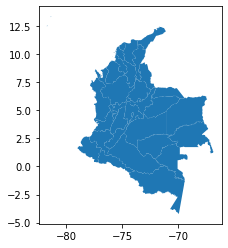

In [12]:
# Geometry
dep_geo.plot() 

#### Municipalities spatial data

In [13]:
#Reviewing data type
mun_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DPTO_CCDGO  1121 non-null   object  
 1   MPIO_CCDGO  1121 non-null   object  
 2   MPIO_CDPMP  1121 non-null   object  
 3   DPTO_CNMBR  1121 non-null   object  
 4   MPIO_CNMBR  1121 non-null   object  
 5   MPIO_CRSLC  1121 non-null   object  
 6   MPIO_NAREA  1121 non-null   float64 
 7   MPIO_CSMBL  1121 non-null   object  
 8   MPIO_VGNC   1121 non-null   int64   
 9   MPIO_TIPO   1121 non-null   object  
 10  Shape_Leng  1121 non-null   float64 
 11  Shape_Area  1121 non-null   float64 
 12  geometry    1121 non-null   geometry
dtypes: float64(3), geometry(1), int64(1), object(8)
memory usage: 114.0+ KB


In [14]:
# Preview
mun_geo.head() 

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,Shape_Leng,Shape_Area,geometry
0,05,001,05001,ANTIOQUIA,MEDELLÍN,1965,374.812877,4,2021,MUNICIPIO,1.032546,0.030606,"POLYGON ((-75.66974 6.37360, -75.66965 6.37360..."
1,05,002,05002,ANTIOQUIA,ABEJORRAL,1814,507.141095,4,2021,MUNICIPIO,1.158504,0.041384,"POLYGON ((-75.46938 5.94575, -75.46897 5.94571..."
2,05,004,05004,ANTIOQUIA,ABRIAQUÍ,1912,296.894050,4,2021,MUNICIPIO,0.812183,0.024248,"POLYGON ((-76.08351 6.75050, -76.08325 6.75048..."
3,05,021,05021,ANTIOQUIA,ALEJANDRÍA,Decreto departamental 304 de 1907,128.932153,4,2021,MUNICIPIO,0.705200,0.010535,"POLYGON ((-75.03320 6.41586, -75.03313 6.41585..."
4,05,030,05030,ANTIOQUIA,AMAGÁ,1912,84.132675,4,2021,MUNICIPIO,0.445241,0.006867,"POLYGON ((-75.67587 6.08561, -75.67540 6.08491..."


<AxesSubplot:>

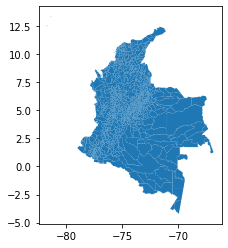

In [15]:
# Geometry
mun_geo.plot() 

##### Types of municipalities

In [16]:
# Types of municipality level entities
mun_geo[['MPIO_TIPO','MPIO_CDPMP']].groupby('MPIO_TIPO').count()

,MPIO_CDPMP
MPIO_TIPO,
ISLA,1
MUNICIPIO,1102
ÁREA NO MUNICIPALIZADA,18


In [17]:
mun_geo[mun_geo['MPIO_TIPO']=='ISLA']

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,Shape_Leng,Shape_Area,geometry
1087,88,001,88001,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",SAN ANDRÉS,Const. política. Art. 309 del 4 de Julio de 1991,27.168346,4,2021,ISLA,0.386451,0.002221,"MULTIPOLYGON (((-81.68843 12.54957, -81.68845 ..."


As mentioned before, from the 1121 municipality level entities, 1102 are legally considered municipalities. There are 18 non-municipalized are that will be kept in the analysis, in contrast to the San Andres Island that will be dropped later in the pre-processing sections.

## Preprocesing

### Terridata

#### Deleting national data

As the non-spatial data set included the national value for the multiple dimensions and indicators, it will be drop to remain with only municipality level entities.

In [18]:
# #Erasing the total national values
# raw_df = raw_df[raw_df.mun_code != '01001']

#### Deleting state data

The Terridata dataset also included department level aggregated data, so these entries will also be dropped.

In [19]:
# # Deleting state data
# raw_df = raw_df[~raw_df['mun_code'].str.endswith('000',na=True)]

In [20]:
# # Number of codes erased
# print('Number of municipality codes erased')
# len(raw_df_control['mun_code'].unique()) - len(raw_df['mun_code'].unique())

In [21]:
# # Number of codes remaining
# print('Number of municipality codes remaning')
# len(raw_df['mun_code'].unique())

#### Data availability over time

<!-- As part of the exploratory data analysis, the time frame of the research and the variables of interest most be selected based on the data available. The dataset structure has municipality entities data in multiple year. To review how complete is the dataset accessories municipalities, dimensions and time, it is required to reshape the structure of the data. -->

In [22]:
# # Pivot table with dimentions and subcategories on the rows, years on the columns and municipalities count as aggregations method
# raw_df_dim = raw_df[(raw_df.num_data.notna())].pivot_table(index='year', values='num_data', aggfunc='count',columns='dim')

In [23]:
# raw_df_dim.head()

Next, the columns headings are translated from Spanish to English.

In [24]:
# # Translation of spanish dimensions to english
# english = ['Environmental',
#  '2005 Census and Dane projections',
#  'Council and citizen security',
#  'Demography and population',
#  'General description',
#  'Economy',
#  'Education',
#  'Public finances',
#  'Justice and law',
#  'Departmental performance measurement',
#  'Municipal performance measurement',
#  'Working market',
#  'Territorial planning',
#  'Poverty',
#  'General budget of the Nation',
#  'Health',
#  'Integral maritime and fluvial security',
#  'Housing and access to public services']

In [25]:
# Set theme for the entire Notebook
sns.set_theme()

In [26]:
# sns.lineplot(data=raw_df_dim, palette="tab10", linewidth=2.5)
# plt.suptitle("Terridata - Data gathered",y=1.015)
# plt.title("By Dimension")
# plt.xlabel("Year")
# plt.ylabel("Number of entries")
# plt.legend(labels=english)
# plt.legend(bbox_to_anchor=(2, 0.5),loc='center right',title='Dimension',labels=english)
# sns.set(rc={'figure.figsize':(6,4)})
# plt.savefig('EDA_Plot_Dim_Year.jpg',dpi=100,bbox_inches='tight')

In [27]:
Image(url= "EDA_Plot_Dim_Year.jpg", width=1000, height=200)

As the previous graph shows, the non-spatial generations process and storage has not been constant in terms of the number of entries by data dimension. The year with the highest number of entries is 2020. This uneven yearly data distribution will be considered further in the research when selecting the variables of interest.

#### Reshape data structure

In [28]:
# # Description of the data
# raw_df.info()

# As this research will only be considered numeric from the non-spatial dataset, qualitative data will be dropped. For timeframe evenness, only final yearly values of the indicators will be kept, that is only values from December.

In [29]:
# #Filtering december and only numerical data
# raw_df_total = raw_df[(raw_df.month==12) & (raw_df.num_data.notna())]

In [30]:
# raw_df_total_wide = raw_df_total.pivot(index='mun_code', columns=['dim','subcat','indicador','year'], values='num_data')

In [31]:
# raw_df_total_wide.head()

### Spatial data

#### Departments

In [32]:
# Review CRS
dep_geo.crs

<Geographic 2D CRS: EPSG:4686>
Name: MAGNA-SIRGAS
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Colombia - onshore and offshore. Includes San Andres y Providencia, Malpelo Islands, Roncador Bank, Serrana Bank and Serranilla Bank.
- bounds: (-84.77, -4.23, -66.87, 15.51)
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [33]:
# Convert to projected CRS from Colombia
dep_geo = dep_geo.to_crs(21897)
dep_geo.crs

<Derived Projected CRS: EPSG:21897>
Name: Bogota 1975 / Colombia Bogota zone
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Colombia - onshore between 1°30'W and 1°30'E of Bogota (75°35'W and 72°35'W of Greenwich).
- bounds: (-75.59, -2.51, -72.58, 11.82)
Coordinate Operation:
- name: Colombia Bogota zone
- method: Transverse Mercator
Datum: Bogota 1975
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

#### Municipalities

In [34]:
# Review CRS
mun_geo.crs

<Geographic 2D CRS: EPSG:4686>
Name: MAGNA-SIRGAS
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Colombia - onshore and offshore. Includes San Andres y Providencia, Malpelo Islands, Roncador Bank, Serrana Bank and Serranilla Bank.
- bounds: (-84.77, -4.23, -66.87, 15.51)
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [35]:
# Convert to projected CRS from Colombia
mun_geo = mun_geo.to_crs(21897)
mun_geo.crs

<Derived Projected CRS: EPSG:21897>
Name: Bogota 1975 / Colombia Bogota zone
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Colombia - onshore between 1°30'W and 1°30'E of Bogota (75°35'W and 72°35'W of Greenwich).
- bounds: (-75.59, -2.51, -72.58, 11.82)
Coordinate Operation:
- name: Colombia Bogota zone
- method: Transverse Mercator
Datum: Bogota 1975
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [36]:
# Calculate centroid of spatial features to later standardization
# As the centroids coordinate value will be considered in the partially spatial clustering, the values must be calculated as a non-spatial attribute to later standardization. 

# Calculating centroids from muninipalities
mun_geo['centroid'] = mun_geo.centroid
mun_geo['cen_lon'] = mun_geo.centroid.apply(lambda p: p.x)
mun_geo['cen_lat'] = mun_geo.centroid.apply(lambda p: p.y)

In [37]:
# Review of the centroid calculation
mun_geo.head()

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,Shape_Leng,Shape_Area,geometry,centroid,cen_lon,cen_lat
0,05,001,05001,ANTIOQUIA,MEDELLÍN,1965,374.812877,4,2021,MUNICIPIO,1.032546,0.030606,"POLYGON ((823816.410 1196817.542, 823827.077 1...",POINT (830275.784 1183964.699),830275.784339,1.183965e+06
1,05,002,05002,ANTIOQUIA,ABEJORRAL,1814,507.141095,4,2021,MUNICIPIO,1.158504,0.041384,"POLYGON ((845868.188 1149425.340, 845913.685 1...",POINT (849252.044 1133706.616),849252.044160,1.133707e+06
2,05,004,05004,ANTIOQUIA,ABRIAQUÍ,1912,296.894050,4,2021,MUNICIPIO,0.812183,0.024248,"POLYGON ((778183.219 1238683.337, 778212.466 1...",POINT (777854.911 1225078.230),777854.911449,1.225078e+06
3,05,021,05021,ANTIOQUIA,ALEJANDRÍA,Decreto departamental 304 de 1907,128.932153,4,2021,MUNICIPIO,0.705200,0.010535,"POLYGON ((894267.167 1201318.789, 894274.925 1...",POINT (887905.045 1195764.231),887905.044935,1.195764e+06
4,05,030,05030,ANTIOQUIA,AMAGÁ,1912,84.132675,4,2021,MUNICIPIO,0.445241,0.006867,"POLYGON ((823041.788 1164959.876, 823093.410 1...",POINT (819466.078 1159141.153),819466.077677,1.159141e+06


### Standardisation

#### Terridata

In [38]:
# In order to have consistent distance between the features considered in the non-spatial clustering, the numeric values must be scaled. 
# Next, the codes scales the numeric variable using MinMaxScaler() (sklearn.preprocessing.MinMaxScaler, 2023) align with (Chen, 2023). 
# On the Terridata dataset, all numeric variables will be scaled. On the spatial data, only the coordinates values and the area will be scaled.

scaler = MinMaxScaler()

In [39]:
#raw_df_total_wide.head()

In [40]:
#raw_df_total_wide[('Descripción general','Descripción general','Población total',2022)].max()

In [41]:
# raw_df_total_wide_stan = pd.DataFrame(scaler.fit_transform(raw_df_total_wide.values), columns=raw_df_total_wide.columns, index=raw_df_total_wide.index)

In [42]:
# raw_df_total_wide_stan

#### Spatial data

Only the coordinates and area.

In [43]:
cols_to_scale = ['cen_lon','cen_lat','MPIO_NAREA']
cols_scaled = ['cen_lon_stan','cen_lat_stan','Area']
scaler.fit(mun_geo[cols_to_scale])
mun_geo[cols_scaled] = scaler.transform(mun_geo[cols_to_scale])

In [44]:
# Review of sclaling
mun_geo.head()

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,Shape_Leng,Shape_Area,geometry,centroid,cen_lon,cen_lat,cen_lon_stan,cen_lat_stan,Area
0,05,001,05001,ANTIOQUIA,MEDELLÍN,1965,374.812877,4,2021,MUNICIPIO,1.032546,0.030606,"POLYGON ((823816.410 1196817.542, 823827.077 1...",POINT (830275.784 1183964.699),830275.784339,1.183965e+06,0.408503,0.578960,0.005474
1,05,002,05002,ANTIOQUIA,ABEJORRAL,1814,507.141095,4,2021,MUNICIPIO,1.158504,0.041384,"POLYGON ((845868.188 1149425.340, 845913.685 1...",POINT (849252.044 1133706.616),849252.044160,1.133707e+06,0.420204,0.552376,0.007492
2,05,004,05004,ANTIOQUIA,ABRIAQUÍ,1912,296.894050,4,2021,MUNICIPIO,0.812183,0.024248,"POLYGON ((778183.219 1238683.337, 778212.466 1...",POINT (777854.911 1225078.230),777854.911449,1.225078e+06,0.376181,0.600708,0.004286
3,05,021,05021,ANTIOQUIA,ALEJANDRÍA,Decreto departamental 304 de 1907,128.932153,4,2021,MUNICIPIO,0.705200,0.010535,"POLYGON ((894267.167 1201318.789, 894274.925 1...",POINT (887905.045 1195764.231),887905.044935,1.195764e+06,0.444038,0.585202,0.001725
4,05,030,05030,ANTIOQUIA,AMAGÁ,1912,84.132675,4,2021,MUNICIPIO,0.445241,0.006867,"POLYGON ((823041.788 1164959.876, 823093.410 1...",POINT (819466.078 1159141.153),819466.077677,1.159141e+06,0.401838,0.565830,0.001042


### Variable selection

Taking into account the non-spatial data available over time and how computational expensive spatial clustering procedures might be, from the non-spatial the following variables will be considered.



| Dimension              | Indicator                           |  Year | Units                                        | 
| -----------------------| ------------------------------------|-------|----------------------------------------------|
| General description    | Population                          | 2022  | People                                       |
| General description    | Population density                  | 2022  | People/Km2                                   |
| Population per area    | Rural population                    | 2022  | People                                       |
| Economy                | Per capita economic added value     | 2020  | Colombian Pesos                              |
| Economy                | Economic added value                | 2020  | Thousend of millions of Colombian Pesos      |

In [45]:
# Selecting column in multiindex format
# sub = [('Descripción general','Descripción general','Población total',2022),
#        ('Descripción general','Descripción general','Densidad poblacional',2022),
#        ('Demografía y población','Población desagregada por área','Población rural',2022),
#        ('Economía','Valor agregado municipal','Valor agregado per cápita',2020),
#        ('Economía','Valor agregado municipal','Valor agregado',2020)]

# raw_df_total_wide_stan_sub = raw_df_total_wide_stan[sub]
# raw_df_total_wide_stan_sub

#### Descriptive statistics

In [46]:
# #Transpose of describe function
# total_summary = raw_df_total_wide_stan_sub.describe().round(2)
# total_summary = total_summary.T
# total_summary

In [47]:
# raw_df_total_wide_stan_sub.columns = raw_df_total_wide_stan_sub.columns.map('{0[0]}_{0[1]}_{0[2]}_{0[3]}'.format) 

In [48]:
# raw_df_total_wide_stan_sub

In [49]:
# raw_df_total_wide_stan_sub.info()

#### Save pre-proccesed data

In [50]:
#raw_df_total_wide_stan_sub.to_csv('Data/Terri_data/Pre_processed/pre_processed.csv')

#### Read pre-proccesed data

In [51]:
# Reasing pre-proccesed non spatial data
raw_df_total_wide_stan_sub = pd.read_csv('Data/Terri_data/Pre_processed/pre_processed.csv',dtype=({'mun_code':str}),index_col='mun_code')

In [52]:
#Review data type
raw_df_total_wide_stan_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1102 entries, 05001 to 99773
Data columns (total 5 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Descripción general_Descripción general_Población total_2022                1102 non-null   float64
 1   Descripción general_Descripción general_Densidad poblacional_2022           1102 non-null   float64
 2   Demografía y población_Población desagregada por área_Población rural_2022  1102 non-null   float64
 3   Economía_Valor agregado municipal_Valor agregado per cápita_2020            1102 non-null   float64
 4   Economía_Valor agregado municipal_Valor agregado_2020                       1102 non-null   float64
dtypes: float64(5)
memory usage: 51.7+ KB


### Merge of spatial and non spatial data

Non-spatial and spatial data will be used in this cluster exercise, so they need to be in a common framework. To do this, both will be merged in one geopandas dataset.

#### Non municipalized areas

In [53]:
# Check for completeness of information in the codes

In [54]:
len(list(raw_df_total_wide_stan_sub.index.values))  # this will always work in pandas

1102

In [55]:
len(list(mun_geo.MPIO_CDPMP.values))

1121

In [56]:
# Missing codes in non spatial information (non municipalized areas)
mun_code_miss = set(list(mun_geo.MPIO_CDPMP.values)) - set(list(raw_df_total_wide_stan_sub.index.values))

In [57]:
mun_geo[mun_geo['MPIO_CDPMP'].isin(mun_code_miss)]

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,Shape_Leng,Shape_Area,geometry,centroid,cen_lon,cen_lat,cen_lon_stan,cen_lat_stan,Area
1087,88,001,88001,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",SAN ANDRÉS,Const. política. Art. 309 del 4 de Julio de 1991,27.168346,4,2021,ISLA,0.386451,0.002221,"MULTIPOLYGON (((170982.025 1891353.886, 170979...",POINT (167765.690 1890734.771),1.677657e+05,1.890735e+06,0.000000,0.952811,0.000173
1089,91,263,91263,AMAZONAS,EL ENCANTO,Decreto 274 de Mayo 28 de 1953,10897.546705,4,2021,ÁREA NO MUNICIPALIZADA,8.052697,0.885325,"POLYGON ((1116377.061 325550.774, 1116409.039 ...",POINT (1150651.220 270849.907),1.150651e+06,2.708499e+05,0.606047,0.095962,0.165927
1090,91,405,91405,AMAZONAS,LA CHORRERA,Decreto 274 de Mayo 28 de 1953,12726.867908,4,2021,ÁREA NO MUNICIPALIZADA,9.105101,1.033583,"POLYGON ((1039398.516 449697.524, 1039458.952 ...",POINT (1146602.528 354540.744),1.146603e+06,3.545407e+05,0.603550,0.140231,0.193821
1091,91,407,91407,AMAZONAS,LA PEDRERA,Decreto 274 de Mayo 28 de 1953,13668.214896,4,2021,ÁREA NO MUNICIPALIZADA,7.376291,1.105198,"POLYGON ((1403434.075 436838.178, 1403494.203 ...",POINT (1449908.847 333555.797),1.449909e+06,3.335558e+05,0.790569,0.129131,0.208175
1092,91,430,91430,AMAZONAS,LA VICTORIA,ORD 12 DE JULIO 9 DE 1996,1432.794978,4,2021,ÁREA NO MUNICIPALIZADA,2.483170,0.116086,"POLYGON ((1326629.664 497936.426, 1326586.483 ...",POINT (1331070.965 477922.595),1.331071e+06,4.779226e+05,0.717293,0.205495,0.021606
1093,91,460,91460,AMAZONAS,MIRITÍ - PARANÁ,Decreto 274 de Mayo 28 de 1953,16867.532538,4,2021,ÁREA NO MUNICIPALIZADA,6.448395,1.366866,"POLYGON ((1289208.718 490602.272, 1289831.904 ...",POINT (1322093.179 415683.344),1.322093e+06,4.156833e+05,0.711758,0.172573,0.256958
1094,91,530,91530,AMAZONAS,PUERTO ALEGRÍA,ORD 24 DE AGOSTO 01 DE 1997,8494.182494,4,2021,ÁREA NO MUNICIPALIZADA,4.777815,0.690133,"POLYGON ((1052332.863 413926.785, 1053665.723 ...",POINT (1035651.674 386478.116),1.035652e+06,3.864781e+05,0.535138,0.157125,0.129280
1095,91,536,91536,AMAZONAS,PUERTO ARICA,ORD 23 DE AGOSTO 01 DE 1997,13791.326986,4,2021,ÁREA NO MUNICIPALIZADA,8.677672,1.118032,"POLYGON ((1321638.624 337939.802, 1321912.112 ...",POINT (1326078.146 280193.971),1.326078e+06,2.801940e+05,0.714215,0.100905,0.210052
1097,91,669,91669,AMAZONAS,PUERTO SANTANDER,Decreto 274 de Mayo 28 de 1953,14731.088495,4,2021,ÁREA NO MUNICIPALIZADA,10.636046,1.195233,"POLYGON ((1231755.653 455918.791, 1231755.263 ...",POINT (1238117.736 369912.077),1.238118e+06,3.699121e+05,0.659979,0.148362,0.224382
1098,91,798,91798,AMAZONAS,TARAPACÁ,Decreto 274 de Mayo 28 de 1953,9195.877935,4,2021,ÁREA NO MUNICIPALIZADA,5.216630,0.743959,"POLYGON ((1505916.763 269629.196, 1503785.493 ...",POINT (1453174.167 219971.866),1.453174e+06,2.199719e+05,0.792582,0.069050,0.139979


<AxesSubplot:>

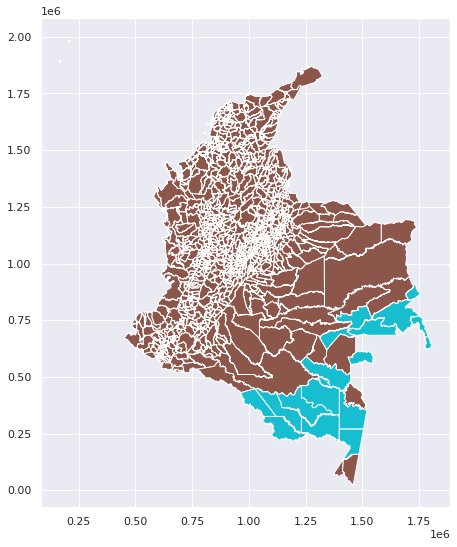

In [58]:
fig, ax = plt.subplots(1,1, figsize=(12,9))
mun_geo.plot(column='MPIO_TIPO',ax=ax)
#legend(labels=['1', '2', '3'])

In [59]:
# As mentioned before, although they are **not legally municipalities**, there are non-municipalized (_blue legend on the previous map_)area in the spatial data set and the will in fact be considered in the analysis.

In [60]:
raw_df_total_wide_stan_sub.head()

,Descripción general_Descripción general_Población total_2022,Descripción general_Descripción general_Densidad poblacional_2022,Demografía y población_Población desagregada por área_Población rural_2022,Economía_Valor agregado municipal_Valor agregado per cápita_2020,Economía_Valor agregado municipal_Valor agregado_2020
mun_code,,,,,
05001,0.330590,0.383748,0.229324,0.112233,0.243379
05002,0.002506,0.002376,0.064796,0.054309,0.000987
05004,0.000215,0.000531,0.008904,0.054750,0.000090
05021,0.000471,0.001808,0.009823,0.055956,0.000196
05030,0.003941,0.021555,0.084302,0.082584,0.002236


#### Merge of datasets

In [61]:
# Merging spatial and non spatial data set using unique municipality id code
mun_geo_merged = pd.merge(mun_geo,raw_df_total_wide_stan_sub,how='left',left_on='MPIO_CDPMP',right_index=True)
mun_geo_merged.head()

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,...,cen_lon,cen_lat,cen_lon_stan,cen_lat_stan,Area,Descripción general_Descripción general_Población total_2022,Descripción general_Descripción general_Densidad poblacional_2022,Demografía y población_Población desagregada por área_Población rural_2022,Economía_Valor agregado municipal_Valor agregado per cápita_2020,Economía_Valor agregado municipal_Valor agregado_2020
0,05,001,05001,ANTIOQUIA,MEDELLÍN,1965,374.812877,4,2021,MUNICIPIO,...,830275.784339,1.183965e+06,0.408503,0.578960,0.005474,0.330590,0.383748,0.229324,0.112233,0.243379
1,05,002,05002,ANTIOQUIA,ABEJORRAL,1814,507.141095,4,2021,MUNICIPIO,...,849252.044160,1.133707e+06,0.420204,0.552376,0.007492,0.002506,0.002376,0.064796,0.054309,0.000987
2,05,004,05004,ANTIOQUIA,ABRIAQUÍ,1912,296.894050,4,2021,MUNICIPIO,...,777854.911449,1.225078e+06,0.376181,0.600708,0.004286,0.000215,0.000531,0.008904,0.054750,0.000090
3,05,021,05021,ANTIOQUIA,ALEJANDRÍA,Decreto departamental 304 de 1907,128.932153,4,2021,MUNICIPIO,...,887905.044935,1.195764e+06,0.444038,0.585202,0.001725,0.000471,0.001808,0.009823,0.055956,0.000196
4,05,030,05030,ANTIOQUIA,AMAGÁ,1912,84.132675,4,2021,MUNICIPIO,...,819466.077677,1.159141e+06,0.401838,0.565830,0.001042,0.003941,0.021555,0.084302,0.082584,0.002236


In [62]:
mun_geo_merged[mun_geo_merged['MPIO_CDPMP'].isin(mun_code_miss)]

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,...,cen_lon,cen_lat,cen_lon_stan,cen_lat_stan,Area,Descripción general_Descripción general_Población total_2022,Descripción general_Descripción general_Densidad poblacional_2022,Demografía y población_Población desagregada por área_Población rural_2022,Economía_Valor agregado municipal_Valor agregado per cápita_2020,Economía_Valor agregado municipal_Valor agregado_2020
1087,88,001,88001,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",SAN ANDRÉS,Const. política. Art. 309 del 4 de Julio de 1991,27.168346,4,2021,ISLA,...,1.677657e+05,1.890735e+06,0.000000,0.952811,0.000173,NaN,NaN,NaN,NaN,NaN
1089,91,263,91263,AMAZONAS,EL ENCANTO,Decreto 274 de Mayo 28 de 1953,10897.546705,4,2021,ÁREA NO MUNICIPALIZADA,...,1.150651e+06,2.708499e+05,0.606047,0.095962,0.165927,NaN,NaN,NaN,NaN,NaN
1090,91,405,91405,AMAZONAS,LA CHORRERA,Decreto 274 de Mayo 28 de 1953,12726.867908,4,2021,ÁREA NO MUNICIPALIZADA,...,1.146603e+06,3.545407e+05,0.603550,0.140231,0.193821,NaN,NaN,NaN,NaN,NaN
1091,91,407,91407,AMAZONAS,LA PEDRERA,Decreto 274 de Mayo 28 de 1953,13668.214896,4,2021,ÁREA NO MUNICIPALIZADA,...,1.449909e+06,3.335558e+05,0.790569,0.129131,0.208175,NaN,NaN,NaN,NaN,NaN
1092,91,430,91430,AMAZONAS,LA VICTORIA,ORD 12 DE JULIO 9 DE 1996,1432.794978,4,2021,ÁREA NO MUNICIPALIZADA,...,1.331071e+06,4.779226e+05,0.717293,0.205495,0.021606,NaN,NaN,NaN,NaN,NaN
1093,91,460,91460,AMAZONAS,MIRITÍ - PARANÁ,Decreto 274 de Mayo 28 de 1953,16867.532538,4,2021,ÁREA NO MUNICIPALIZADA,...,1.322093e+06,4.156833e+05,0.711758,0.172573,0.256958,NaN,NaN,NaN,NaN,NaN
1094,91,530,91530,AMAZONAS,PUERTO ALEGRÍA,ORD 24 DE AGOSTO 01 DE 1997,8494.182494,4,2021,ÁREA NO MUNICIPALIZADA,...,1.035652e+06,3.864781e+05,0.535138,0.157125,0.129280,NaN,NaN,NaN,NaN,NaN
1095,91,536,91536,AMAZONAS,PUERTO ARICA,ORD 23 DE AGOSTO 01 DE 1997,13791.326986,4,2021,ÁREA NO MUNICIPALIZADA,...,1.326078e+06,2.801940e+05,0.714215,0.100905,0.210052,NaN,NaN,NaN,NaN,NaN
1097,91,669,91669,AMAZONAS,PUERTO SANTANDER,Decreto 274 de Mayo 28 de 1953,14731.088495,4,2021,ÁREA NO MUNICIPALIZADA,...,1.238118e+06,3.699121e+05,0.659979,0.148362,0.224382,NaN,NaN,NaN,NaN,NaN
1098,91,798,91798,AMAZONAS,TARAPACÁ,Decreto 274 de Mayo 28 de 1953,9195.877935,4,2021,ÁREA NO MUNICIPALIZADA,...,1.453174e+06,2.199719e+05,0.792582,0.069050,0.139979,NaN,NaN,NaN,NaN,NaN


#### Filling variables of interest for non municipalized areas

Given their sui-generis nature, the non-municipalized areas do not have some non-spatial features that will be considered in the clustering exercise (e.g.: population, economic added value). 

To sort this out, this research proposed to fill this Na’s values with the mean of the neighbouring municipalities in that given feature, using a queen adjacency criterion. By doing so, the non-NA’s value for the clustering would be complied. This missing data procedure will be also consistent with Tobler’s law of geography (Tobler, 1970).

In [63]:
columns_to_fill = list(raw_df_total_wide_stan_sub)

In [64]:
#Profiling to html
#profile = ProfileReport(raw_df_total_wide_stan_sub, title="Pandas Profiling Report")
#profile.to_file("Profile_raw_df_total_wide_stan_sub.html")
#profile.to_notebook_iframe()

In [65]:
#First iteration of fillling NA's
for col in columns_to_fill:
    for i, row in mun_geo_merged.iterrows():
        if np.isnan(row[col]):
            neighbors = mun_geo_merged[mun_geo_merged.geometry.touches(row.geometry)].copy()
            neighbors['mean'] = neighbors[col].mean()
            mean = neighbors['mean'].mean()
            mun_geo_merged.at[i, col] = mean

In [66]:
mun_geo_merged[mun_geo_merged['MPIO_CDPMP'].isin(mun_code_miss)]

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,...,cen_lon,cen_lat,cen_lon_stan,cen_lat_stan,Area,Descripción general_Descripción general_Población total_2022,Descripción general_Descripción general_Densidad poblacional_2022,Demografía y población_Población desagregada por área_Población rural_2022,Economía_Valor agregado municipal_Valor agregado per cápita_2020,Economía_Valor agregado municipal_Valor agregado_2020
1087,88,001,88001,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",SAN ANDRÉS,Const. política. Art. 309 del 4 de Julio de 1991,27.168346,4,2021,ISLA,...,1.677657e+05,1.890735e+06,0.000000,0.952811,0.000173,NaN,NaN,NaN,NaN,NaN
1089,91,263,91263,AMAZONAS,EL ENCANTO,Decreto 274 de Mayo 28 de 1953,10897.546705,4,2021,ÁREA NO MUNICIPALIZADA,...,1.150651e+06,2.708499e+05,0.606047,0.095962,0.165927,NaN,NaN,NaN,NaN,NaN
1090,91,405,91405,AMAZONAS,LA CHORRERA,Decreto 274 de Mayo 28 de 1953,12726.867908,4,2021,ÁREA NO MUNICIPALIZADA,...,1.146603e+06,3.545407e+05,0.603550,0.140231,0.193821,0.002520,0.000074,0.066826,0.020108,0.000455
1091,91,407,91407,AMAZONAS,LA PEDRERA,Decreto 274 de Mayo 28 de 1953,13668.214896,4,2021,ÁREA NO MUNICIPALIZADA,...,1.449909e+06,3.335558e+05,0.790569,0.129131,0.208175,0.000193,0.000007,0.007207,0.028137,0.000024
1092,91,430,91430,AMAZONAS,LA VICTORIA,ORD 12 DE JULIO 9 DE 1996,1432.794978,4,2021,ÁREA NO MUNICIPALIZADA,...,1.331071e+06,4.779226e+05,0.717293,0.205495,0.021606,0.001345,0.000000,0.045879,0.020061,0.000232
1093,91,460,91460,AMAZONAS,MIRITÍ - PARANÁ,Decreto 274 de Mayo 28 de 1953,16867.532538,4,2021,ÁREA NO MUNICIPALIZADA,...,1.322093e+06,4.156833e+05,0.711758,0.172573,0.256958,0.000961,0.000002,0.032988,0.022753,0.000163
1094,91,530,91530,AMAZONAS,PUERTO ALEGRÍA,ORD 24 DE AGOSTO 01 DE 1997,8494.182494,4,2021,ÁREA NO MUNICIPALIZADA,...,1.035652e+06,3.864781e+05,0.535138,0.157125,0.129280,0.002520,0.000074,0.066826,0.020108,0.000455
1095,91,536,91536,AMAZONAS,PUERTO ARICA,ORD 23 DE AGOSTO 01 DE 1997,13791.326986,4,2021,ÁREA NO MUNICIPALIZADA,...,1.326078e+06,2.801940e+05,0.714215,0.100905,0.210052,0.001225,0.000028,0.035674,0.023666,0.000214
1097,91,669,91669,AMAZONAS,PUERTO SANTANDER,Decreto 274 de Mayo 28 de 1953,14731.088495,4,2021,ÁREA NO MUNICIPALIZADA,...,1.238118e+06,3.699121e+05,0.659979,0.148362,0.224382,0.001513,0.000026,0.045342,0.021647,0.000266
1098,91,798,91798,AMAZONAS,TARAPACÁ,Decreto 274 de Mayo 28 de 1953,9195.877935,4,2021,ÁREA NO MUNICIPALIZADA,...,1.453174e+06,2.199719e+05,0.792582,0.069050,0.139979,0.002268,0.000231,0.038996,0.036711,0.000730


In [67]:
# Completeness review after first iteration of filling Na's
mun_geo_merged[mun_geo_merged[columns_to_fill].isna().all(1)]

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,...,cen_lon,cen_lat,cen_lon_stan,cen_lat_stan,Area,Descripción general_Descripción general_Población total_2022,Descripción general_Descripción general_Densidad poblacional_2022,Demografía y población_Población desagregada por área_Población rural_2022,Economía_Valor agregado municipal_Valor agregado per cápita_2020,Economía_Valor agregado municipal_Valor agregado_2020
1087,88,001,88001,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",SAN ANDRÉS,Const. política. Art. 309 del 4 de Julio de 1991,27.168346,4,2021,ISLA,...,1.677657e+05,1.890735e+06,0.000000,0.952811,0.000173,NaN,NaN,NaN,NaN,NaN
1089,91,263,91263,AMAZONAS,EL ENCANTO,Decreto 274 de Mayo 28 de 1953,10897.546705,4,2021,ÁREA NO MUNICIPALIZADA,...,1.150651e+06,2.708499e+05,0.606047,0.095962,0.165927,NaN,NaN,NaN,NaN,NaN
1101,94,883,94883,GUAINÍA,SAN FELIPE,Resolución 83,2926.365125,4,2021,ÁREA NO MUNICIPALIZADA,...,1.751267e+06,7.318111e+05,0.976386,0.339791,0.044381,NaN,NaN,NaN,NaN,NaN
1103,94,885,94885,GUAINÍA,LA GUADALUPE,Resolución 83,1178.870701,4,2021,ÁREA NO MUNICIPALIZADA,...,1.789564e+06,6.482318e+05,1.000000,0.295581,0.017734,NaN,NaN,NaN,NaN,NaN


In [68]:
#Second iteration of fillling NA's
for col in columns_to_fill:
    for i, row in mun_geo_merged.iterrows():
        if np.isnan(row[col]):
            neighbors = mun_geo_merged[mun_geo_merged.geometry.touches(row.geometry)].copy()
            neighbors['mean'] = neighbors[col].mean()
            mean = neighbors['mean'].mean()
            mun_geo_merged.at[i, col] = mean

In [69]:
# Completeness review after second iteration of filling Na's
mun_geo_merged[mun_geo_merged[columns_to_fill].isna().all(1)]

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,...,cen_lon,cen_lat,cen_lon_stan,cen_lat_stan,Area,Descripción general_Descripción general_Población total_2022,Descripción general_Descripción general_Densidad poblacional_2022,Demografía y población_Población desagregada por área_Población rural_2022,Economía_Valor agregado municipal_Valor agregado per cápita_2020,Economía_Valor agregado municipal_Valor agregado_2020
1087,88,001,88001,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",SAN ANDRÉS,Const. política. Art. 309 del 4 de Julio de 1991,27.168346,4,2021,ISLA,...,167765.689984,1.890735e+06,0.0,0.952811,0.000173,NaN,NaN,NaN,NaN,NaN


In [70]:
mun_geo_merged[mun_geo_merged.MPIO_CDPMP=='88564']

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,...,cen_lon,cen_lat,cen_lon_stan,cen_lat_stan,Area,Descripción general_Descripción general_Población total_2022,Descripción general_Descripción general_Densidad poblacional_2022,Demografía y población_Población desagregada por área_Población rural_2022,Economía_Valor agregado municipal_Valor agregado per cápita_2020,Economía_Valor agregado municipal_Valor agregado_2020
1086,88,564,88564,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",PROVIDENCIA,Decreto 2964B del 13 de Noviembre de 1953,22.249191,4,2021,MUNICIPIO,...,207998.906886,1.979946e+06,0.024808,1.0,0.000098,0.00067,0.018204,0.014111,0.092601,0.000455


In [71]:
mun_geo_merged[mun_geo_merged.MPIO_CDPMP=='88001']

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,...,cen_lon,cen_lat,cen_lon_stan,cen_lat_stan,Area,Descripción general_Descripción general_Población total_2022,Descripción general_Descripción general_Densidad poblacional_2022,Demografía y población_Población desagregada por área_Población rural_2022,Economía_Valor agregado municipal_Valor agregado per cápita_2020,Economía_Valor agregado municipal_Valor agregado_2020
1087,88,001,88001,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",SAN ANDRÉS,Const. política. Art. 309 del 4 de Julio de 1991,27.168346,4,2021,ISLA,...,167765.689984,1.890735e+06,0.0,0.952811,0.000173,NaN,NaN,NaN,NaN,NaN


As there are island belonging to Colombia in the Caribbean sea, they are not connected to the continent and will not be considered in the clustering analysis.

In [72]:
# Removing San Andres and Providencia Island
mun_geo_merged.drop(mun_geo_merged[mun_geo_merged.MPIO_CDPMP=='88001'].index,inplace=True)
mun_geo_merged.drop(mun_geo_merged[mun_geo_merged.MPIO_CDPMP=='88564'].index,inplace=True)

In [73]:
# Rename and translation of features of interest
mun_geo_merged_clean_name = mun_geo_merged.rename(columns={'Descripción general_Descripción general_Población total_2022': 'Population - 2022',
                        'Descripción general_Descripción general_Densidad poblacional_2022': 'Population density - 2022',
                        'Demografía y población_Población desagregada por área_Población rural_2022': 'Rural population - 2022',
                        'Economía_Valor agregado municipal_Valor agregado per cápita_2020': 'Per capita added value - 2020',
                        'Economía_Valor agregado municipal_Valor agregado_2020': 'Added value - 2020',
                        'cen_lon_stan': 'Centroid longitude',
                        'cen_lat_stan': 'Centroid latitude'})

In [74]:
# New names review
mun_geo_merged_clean_name.head()

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,...,cen_lon,cen_lat,Centroid longitude,Centroid latitude,Area,Population - 2022,Population density - 2022,Rural population - 2022,Per capita added value - 2020,Added value - 2020
0,05,001,05001,ANTIOQUIA,MEDELLÍN,1965,374.812877,4,2021,MUNICIPIO,...,830275.784339,1.183965e+06,0.408503,0.578960,0.005474,0.330590,0.383748,0.229324,0.112233,0.243379
1,05,002,05002,ANTIOQUIA,ABEJORRAL,1814,507.141095,4,2021,MUNICIPIO,...,849252.044160,1.133707e+06,0.420204,0.552376,0.007492,0.002506,0.002376,0.064796,0.054309,0.000987
2,05,004,05004,ANTIOQUIA,ABRIAQUÍ,1912,296.894050,4,2021,MUNICIPIO,...,777854.911449,1.225078e+06,0.376181,0.600708,0.004286,0.000215,0.000531,0.008904,0.054750,0.000090
3,05,021,05021,ANTIOQUIA,ALEJANDRÍA,Decreto departamental 304 de 1907,128.932153,4,2021,MUNICIPIO,...,887905.044935,1.195764e+06,0.444038,0.585202,0.001725,0.000471,0.001808,0.009823,0.055956,0.000196
4,05,030,05030,ANTIOQUIA,AMAGÁ,1912,84.132675,4,2021,MUNICIPIO,...,819466.077677,1.159141e+06,0.401838,0.565830,0.001042,0.003941,0.021555,0.084302,0.082584,0.002236


In [75]:
# Data type review
mun_geo_merged_clean_name.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1119 entries, 0 to 1120
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   DPTO_CCDGO                     1119 non-null   object  
 1   MPIO_CCDGO                     1119 non-null   object  
 2   MPIO_CDPMP                     1119 non-null   object  
 3   DPTO_CNMBR                     1119 non-null   object  
 4   MPIO_CNMBR                     1119 non-null   object  
 5   MPIO_CRSLC                     1119 non-null   object  
 6   MPIO_NAREA                     1119 non-null   float64 
 7   MPIO_CSMBL                     1119 non-null   object  
 8   MPIO_VGNC                      1119 non-null   int64   
 9   MPIO_TIPO                      1119 non-null   object  
 10  Shape_Leng                     1119 non-null   float64 
 11  Shape_Area                     1119 non-null   float64 
 12  geometry                  

In [76]:
# Creating of control copy of geopandas dataframe
mun_geo_merged_clean_name_control = mun_geo_merged_clean_name.copy()

In [77]:
# Shape review
mun_geo_merged_clean_name_control.shape

(1119, 24)

In [78]:
# Review
mun_geo_merged_clean_name_control.head()

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,...,cen_lon,cen_lat,Centroid longitude,Centroid latitude,Area,Population - 2022,Population density - 2022,Rural population - 2022,Per capita added value - 2020,Added value - 2020
0,05,001,05001,ANTIOQUIA,MEDELLÍN,1965,374.812877,4,2021,MUNICIPIO,...,830275.784339,1.183965e+06,0.408503,0.578960,0.005474,0.330590,0.383748,0.229324,0.112233,0.243379
1,05,002,05002,ANTIOQUIA,ABEJORRAL,1814,507.141095,4,2021,MUNICIPIO,...,849252.044160,1.133707e+06,0.420204,0.552376,0.007492,0.002506,0.002376,0.064796,0.054309,0.000987
2,05,004,05004,ANTIOQUIA,ABRIAQUÍ,1912,296.894050,4,2021,MUNICIPIO,...,777854.911449,1.225078e+06,0.376181,0.600708,0.004286,0.000215,0.000531,0.008904,0.054750,0.000090
3,05,021,05021,ANTIOQUIA,ALEJANDRÍA,Decreto departamental 304 de 1907,128.932153,4,2021,MUNICIPIO,...,887905.044935,1.195764e+06,0.444038,0.585202,0.001725,0.000471,0.001808,0.009823,0.055956,0.000196
4,05,030,05030,ANTIOQUIA,AMAGÁ,1912,84.132675,4,2021,MUNICIPIO,...,819466.077677,1.159141e+06,0.401838,0.565830,0.001042,0.003941,0.021555,0.084302,0.082584,0.002236


In addition to the non-spatial features mentioned in above sections, for the partially spatial clustering analysis, the latitude and longitude coordinates will be included in the variables of interest.

In [79]:
#Including standarized centroids, non spatial and Area as variabels of interest
list(mun_geo_merged_clean_name_control.columns)[-8:]

['Centroid longitude',
 'Centroid latitude',
 'Area',
 'Population - 2022',
 'Population density - 2022',
 'Rural population - 2022',
 'Per capita added value - 2020',
 'Added value - 2020']

In [80]:
# Columns of interest to list
cols_to_plot = list(mun_geo_merged_clean_name_control.columns)[-8:]

In [81]:
#mun_geo_merged_clean_name.head()

In [82]:
mun_geo_merged_clean_name_ana = mun_geo_merged_clean_name[cols_to_plot]

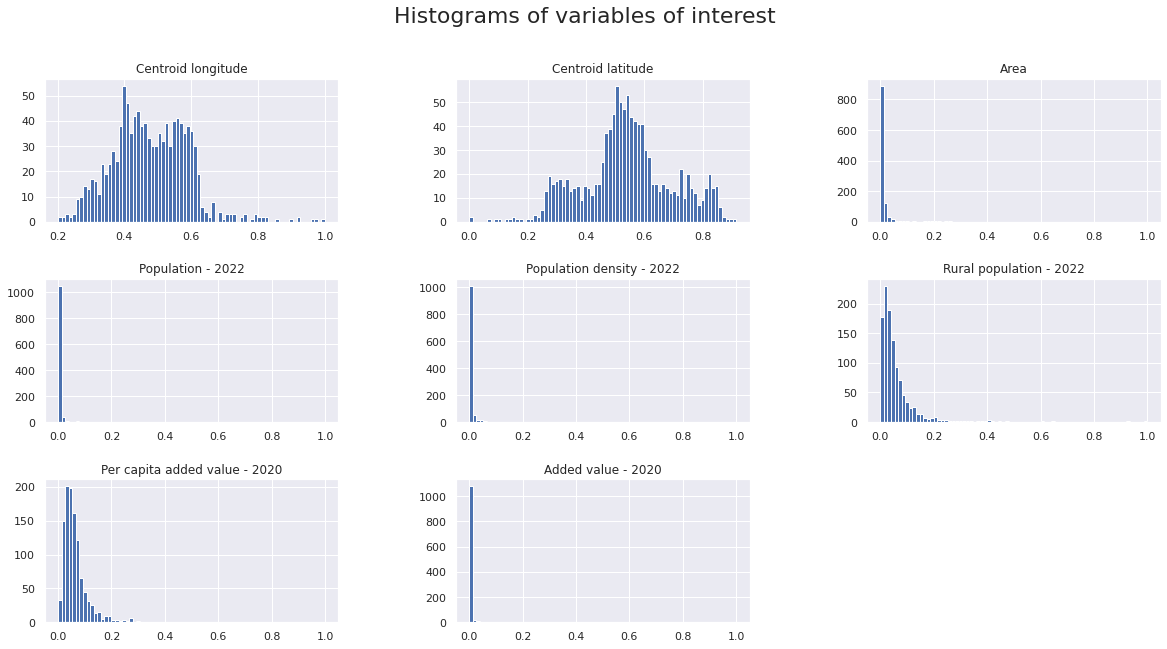

In [83]:
mun_geo_merged_clean_name_ana_hist = mun_geo_merged_clean_name_ana.hist(figsize = (20,10),bins=75)
plt.suptitle('Histograms of variables of interest',fontsize=22)
#ax.set_title("test")
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

The previous plots show how the non-spatial variable of interest are highly right skewed. The rural population and per capita added value, area also right skewed but in a minor level that their peers.


Regarding the latitude and longitude coordinates value, they present a more normal looking distribution, without being completely normal distributed. This resemblance with a normal distribution is related with the coordinate reference system, which has Bogotá, Colombia’s Capital at its origin.


# Methodology

Given the spatial and non-spatial nature of the research question, cluster analysis will be used considering socio-economic non spatial, partially spatial data and the spatial structure of the municipalities in Colombia.

This research pretends to use the following cluster techniques:
1. Non spatial clustering: This exercise will only consider non-spatial variables of municipalities.
2. Partially spatial clustering: In addition to the previous subset of features, the longitude and latitude coordinates will be included in the variables of interest.
3. Spatial clustering: The spatial clustering exercise will include non-spatial features and the spatial structure and connectivity of the municipalities.


For assessing the quality of the clustering, Elbow and silhouette methods will be conducted. To visualize the clustering results, dendrograms plot will be presented coupled with geographic outputs to review the adjacency and possible regional cohesion.

A complementary analysis regarding the interpretation of the results is comparing the clustering results to the current department political administrative grouping.






## Clustering

When analyzing the quality for clusters, the silhouette score assesses how well the clustering process classifies the observations. A value of 1 in this metric, means that best fit, and -1 means the worst fit. In the case of a value of zero, it means that there are overlapping clusters (sklearn.metrics.silhouette_score, 2023).

Before performing the cluster analysis, an initial baseline will be set calculating the silhouette score for the non and partially spatial variable of interest using the current state municipality division.

In [84]:
#Subsetting the non-spatial variables of interest
list(mun_geo_merged_clean_name_control.columns)[-6:]

['Area',
 'Population - 2022',
 'Population density - 2022',
 'Rural population - 2022',
 'Per capita added value - 2020',
 'Added value - 2020']

In [85]:
#mun_geo_merged_clean_name_control

In [86]:
non_spatial = list(mun_geo_merged_clean_name_control.columns)[-6:]

In [87]:
list(mun_geo_merged_clean_name_control.columns)[-8:]

['Centroid longitude',
 'Centroid latitude',
 'Area',
 'Population - 2022',
 'Population density - 2022',
 'Rural population - 2022',
 'Per capita added value - 2020',
 'Added value - 2020']

In [88]:
# Subsetting the partially spatial variables of interest
part_spatial = list(mun_geo_merged_clean_name_control.columns)[-8:]

In [89]:
metrics.silhouette_score(mun_geo_merged_clean_name_control[non_spatial], mun_geo_merged_clean_name_control['DPTO_CCDGO'])

-0.25408873980681446

In [90]:
metrics.silhouette_score(mun_geo_merged_clean_name_control[part_spatial], mun_geo_merged_clean_name_control['DPTO_CCDGO'])

0.024466913943670746

When using non-spatial data, the score registered a negative value. In the case of spatially spatial data, the value is positive but close to zero.

### Function for ploting clusters centroids

In [91]:
# A plotting function by (Radečić, 2022) cited by (Chen, 2023) is included to visualize the overlapping and distance of the clusters centroids.

In [92]:
# Radar plot of the cluster centroids
# adapted from this tutorial: https://towardsdatascience.com/how-to-make-stunning-radar-charts-with-python-implemented-in-matplotlib-and-plotly-91e21801d8ca
def radar_plot_cluster_centroids(method,df_cluster_centroid):
    # parameters
    # df_cluster_centroid: a dataframe with rows representing a cluster centroid and columns representing variables
    
    # add an additional element to both categories and restaurants that’s identical to the first item
    # manually 'close' the line
    categories = df_cluster_centroid.columns.values.tolist()
    categories = [*categories, categories[0]]
    
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))
    
    plt.figure(figsize=(12, 8))
    plt.subplot(polar=True)
    for index, row in df_cluster_centroid.iterrows():
        centroid = row.tolist()
        centroid = [*centroid, centroid[0]]
        label = "Cluster {}".format(index)
        plt.plot(label_loc, centroid, label=label)
    plt.title('Cluster centroid comparison'+' - '+ method, size=20, y=1.05)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
    plt.legend(bbox_to_anchor=(1.4, 0.5),loc='center right')
    plt.show()

### Non spatial clustering

#### DBSCAN

In [93]:
# Although observations that are classified with a label of -1 in the cluster analysis algorithms comes as noisy in the analyses(sklearn.cluster.DBSCAN, 2023) cited by (Chen, 2023), they are kept to visualize the spatial pattern that might emerge.

In [94]:
# Regarding the number of minimum points when using DBSCAN, the value used is 7, considering that there will be 6 non-spatial features considered (Chen, 2023). In this case, the epsilon value should be consistent with the scaling done before, so the value of 0.05 will be taken as the initial local radius of the clusters. 

In [95]:
minPts = 7 # we set minPts as normed.shape[1] + 1 
epsilon = 0.05
dbsc_non = DBSCAN(eps=epsilon, min_samples=minPts)
dbsc_non.fit(mun_geo_merged_clean_name[non_spatial])


mun_geo_merged_clean_name['non_spatial_dbscan'] = dbsc_non.labels_

In [96]:
# Summary
pd.Series(dbsc_non.labels_).value_counts()

 0    1055
-1      64
dtype: int64

In [97]:
#Number of clusters
len(mun_geo_merged_clean_name['non_spatial_dbscan'].unique())

2

In [98]:
# Municipalities by cluster
mun_geo_merged_clean_name[['non_spatial_dbscan','MPIO_CDPMP']].groupby('non_spatial_dbscan').count()

,MPIO_CDPMP
non_spatial_dbscan,
-1,64
0,1055


In [99]:
mun_geo_merged_clean_name.groupby('non_spatial_dbscan')['MPIO_CDPMP'].count().mean()

559.5

In [100]:
metrics.silhouette_score(mun_geo_merged_clean_name_control[non_spatial], dbsc_non.labels_)

0.7406175510649436

<AxesSubplot:>

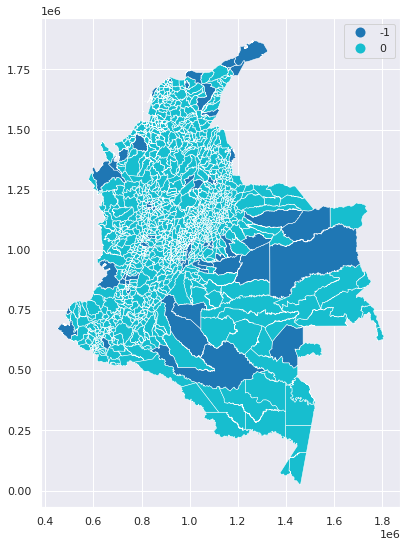

In [101]:
fig, ax = plt.subplots(1,1, figsize=(12,9))
mun_geo_merged_clean_name.plot(column='non_spatial_dbscan',ax=ax,legend=True,linewidth=0.5,categorical=True)

In [102]:
#mun_geo_merged_clean_name_control[non_spatial]

**Clustering comparasion**

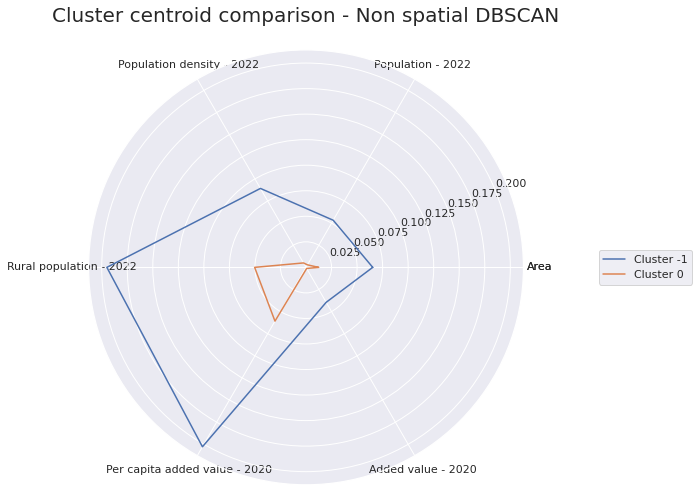

In [103]:
df_dbscan_non = mun_geo_merged_clean_name_control[non_spatial].copy()
df_dbscan_non['non_spatial_dbscan'] = dbsc_non.labels_
df_dbscan_non_centroid = df_dbscan_non.groupby('non_spatial_dbscan').mean()
# drop the outlier
#df_dbscan_non_centroid.drop(-1, inplace=True)
# df_dbscan_centroid.reset_index()
radar_plot_cluster_centroids('Non spatial DBSCAN',df_dbscan_non_centroid)
#plt.title('Non spatial cluster centroid comparison', size=20, y=1.05)

In [104]:
df_dbscan_non_centroid

,Area,Population - 2022,Population density - 2022,Rural population - 2022,Per capita added value - 2020,Added value - 2020
non_spatial_dbscan,,,,,,
-1,0.065310,0.053268,0.089234,0.194968,0.202792,0.039499
0,0.012272,0.002846,0.005002,0.050300,0.060772,0.001243


In [105]:
#Silhouette Score
metrics.silhouette_score(mun_geo_merged_clean_name_control[non_spatial], dbsc_non.labels_)

0.7406175510649436

In [106]:
# Both the graph and the silhouette score, present a good fit when doing DBSCAN clustering with non-spatial data (sklearn.cluster.DBSCAN, 2023) with 2 components. With a value relatively close to 1 in the silhouette score and a limited overlapping as shown in the centroid radar graph, excluding spatial data, facilitates a more simplified clustering process.

#### Kmeans

To prevent randomness in kmeans, the n_init is set to 50.

In [107]:
k_cluster = 4
random_seed = 1
kmeans_method_non_spatial = KMeans(n_clusters=k_cluster,random_state=random_seed, n_init=50)
kmeans_method_non_spatial.fit(mun_geo_merged_clean_name[non_spatial])

KMeans(n_clusters=4, n_init=50, random_state=1)

In [108]:
mun_geo_merged_clean_name['non_spatial_kmeans'] = kmeans_method_non_spatial.labels_

Clustering comparasion

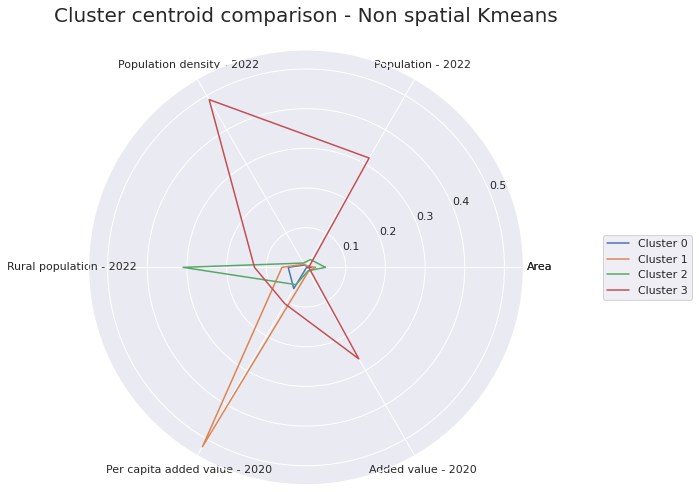

In [109]:
df_kmeans_non_spatial = mun_geo_merged_clean_name_control[non_spatial].copy()
df_kmeans_non_spatial['non_spatial_kmeans'] = kmeans_method_non_spatial.labels_
df_kmeans_non_spatial_centroid = df_kmeans_non_spatial.groupby('non_spatial_kmeans').mean()
# drop the outlier
#df_kmeans_non_spatial_centroid.drop(-1, inplace=True)
# df_dbscan_centroid.reset_index()
radar_plot_cluster_centroids('Non spatial Kmeans',df_kmeans_non_spatial_centroid)

In [110]:
df_kmeans_non_spatial_centroid

,Area,Population - 2022,Population density - 2022,Rural population - 2022,Per capita added value - 2020,Added value - 2020
non_spatial_kmeans,,,,,,
0,0.013452,0.003049,0.006930,0.044837,0.061821,0.001415
1,0.022724,0.004401,0.009000,0.060569,0.521980,0.012017
2,0.048852,0.022769,0.012547,0.309895,0.050301,0.010062
3,0.006859,0.318237,0.488160,0.129888,0.106156,0.266390


In [111]:
metrics.silhouette_score(mun_geo_merged_clean_name_control[non_spatial], kmeans_method_non_spatial.labels_)

0.6906030835567017

In [112]:
# With 4 components, although the silhouette scored slightly decreased, visually in the radar plot, it seems that the kmeans results deliver a better defined and less overlapped clusters when using just non-spatial data.

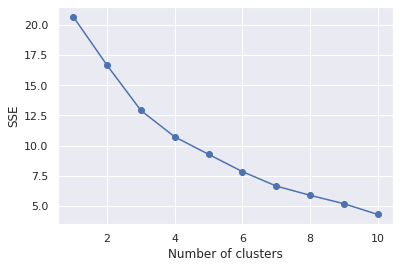

In [113]:
# Elbow analysis 
# calculate SSE for a range of number of cluster
list_SSE_non = []
min_k = 1
max_k = 10
range_k = range(min_k, max_k+1)
for i in range_k:
    km_non = KMeans(
        n_clusters=i, init='random',
        n_init=50, max_iter=300,
        tol=1e-04, random_state=1
    )
    km_non.fit(mun_geo_merged_clean_name[non_spatial])
    # inertia is a concept from physics. Roughly it means SSE of clustering.
    list_SSE_non.append(km_non.inertia_)

# plot
plt.plot(range_k, list_SSE_non, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [114]:
# It seams visually that the best number of clusters for the non-spatial kmeans method is 3. Next, the kmeans analysis is reran with 3 clusters.

##### Reviewed

In [115]:
k_cluster = 3
random_seed = 1
kmeans_method_non_spatial_re = KMeans(n_clusters=k_cluster,random_state=random_seed, n_init=50)
kmeans_method_non_spatial_re.fit(mun_geo_merged_clean_name[non_spatial])

KMeans(n_clusters=3, n_init=50, random_state=1)

In [116]:
mun_geo_merged_clean_name['non_spatial_kmeans_re'] = kmeans_method_non_spatial_re.labels_

Clustering comparasion

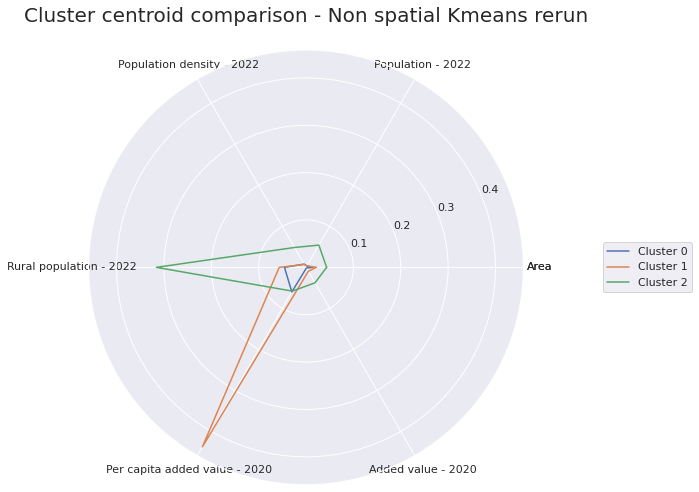

In [117]:
df_kmeans_non_spatial_re = mun_geo_merged_clean_name_control[non_spatial].copy()
df_kmeans_non_spatial_re['non_spatial_kmeans_re'] = kmeans_method_non_spatial_re.labels_
df_kmeans_non_spatial_re_centroid = df_kmeans_non_spatial_re.groupby('non_spatial_kmeans_re').mean()
# drop the outlier
#df_kmeans_non_spatial_centroid.drop(-1, inplace=True)
# df_dbscan_centroid.reset_index()
radar_plot_cluster_centroids('Non spatial Kmeans rerun',df_kmeans_non_spatial_re_centroid)

In [118]:
df_kmeans_non_spatial_re_centroid

,Area,Population - 2022,Population density - 2022,Rural population - 2022,Per capita added value - 2020,Added value - 2020
non_spatial_kmeans_re,,,,,,
0,0.013712,0.003304,0.007919,0.045501,0.059882,0.001519
1,0.021155,0.003898,0.007035,0.056558,0.437303,0.009648
2,0.043575,0.054225,0.048491,0.315887,0.057899,0.037759


In [119]:
metrics.silhouette_score(mun_geo_merged_clean_name_control[non_spatial], kmeans_method_non_spatial_re.labels_)

0.7163485396092468

In [120]:
# After repeating the non-spatial kmaens analysis, the silhouette score slightly increased.

#### Hierarchical clustering

The code of **plot_dendrogram** is based on the practical material, which is largely based on this [tutorial](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py).

In [121]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, leaf_rotation=90., **kwargs)

In [122]:
agg_cluster_non = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(mun_geo_merged_clean_name_control[non_spatial])

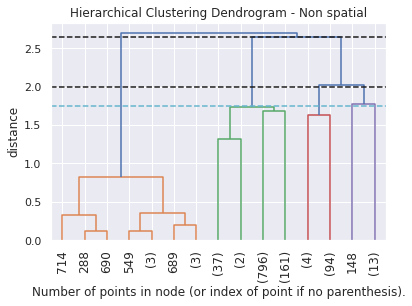

In [123]:
ax = plt.gca()
plt.title("Hierarchical Clustering Dendrogram - Non spatial")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_cluster_non, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel('distance')
plt.hlines(2.65, ax.get_xlim()[0], ax.get_xlim()[1], linestyle='dashed', color='k')
plt.hlines(2, ax.get_xlim()[0], ax.get_xlim()[1], linestyle='dashed', color='k')
plt.hlines(1.75, ax.get_xlim()[0], ax.get_xlim()[1], linestyle='dashed', color='c')
plt.show()

In [124]:
# The distance between 3 and 4 clusters, is greater than the distance between the 4 and 5 clusters. This indicates that it is preferable to keep the 4 clusters, instead of 5 in the case of the non-spatial hierarchical clustering exercise.

In [125]:
# Storing clusters lablel
mun_geo_merged_clean_name['non_spatial_hierarchical'] = agg_cluster_non.labels_

##### Reviewed

In [126]:
agg_cluster_non_re = AgglomerativeClustering(distance_threshold=None, n_clusters=4).fit(mun_geo_merged_clean_name_control[non_spatial])

In [127]:
# Storing re cluster labels
mun_geo_merged_clean_name['non_spatial_hierarchical_4'] = agg_cluster_non_re.labels_

In [128]:
#Silhouette Score
metrics.silhouette_score(mun_geo_merged_clean_name_control[non_spatial], agg_cluster_non_re.labels_)

0.5901086156188036

In [129]:
# The non-spatial hierarchical clustering exercise with k=4 registered a value slight lower that the non-spatial kmeans and DBSCAN, however, it is still relatively close to 1.

### Partially spatial clustering

#### DBSCAN

In [130]:
# In this case of the partially spatial DBSCAN the number of minimum points will be 9 as the longitude and latitude are included in the variables of interest (Chen, 2023). The epsilon will remain constant.

In [131]:
minPts = 9 # we set minPts as normed.shape[1] + 1 
epsilon = 0.05
dbsc_part = DBSCAN(eps=epsilon, min_samples=minPts)
dbsc_part.fit(mun_geo_merged_clean_name[part_spatial])

# We now have our DBSCAN object created, and we can extract the groups it has identified. We do this using the `.labels_` method.

mun_geo_merged_clean_name['part_spatial_dbscan'] = dbsc_part.labels_

In [132]:
# Summary
pd.Series(dbsc_part.labels_).value_counts()

 0    838
-1    274
 1      7
dtype: int64

<AxesSubplot:>

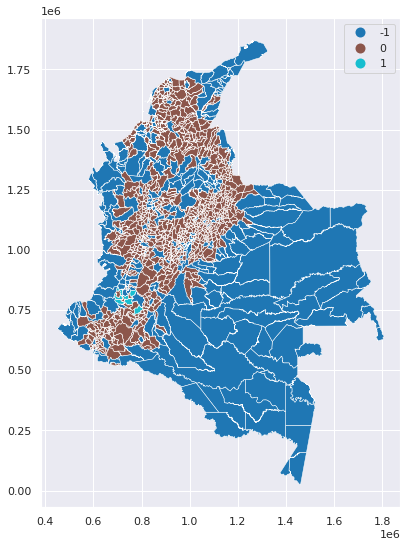

In [133]:
fig, ax = plt.subplots(1,1, figsize=(12,9))
mun_geo_merged_clean_name.plot(column='part_spatial_dbscan',categorical=True,ax=ax,legend=True,linewidth=0.5)

**Clustering comparasion**

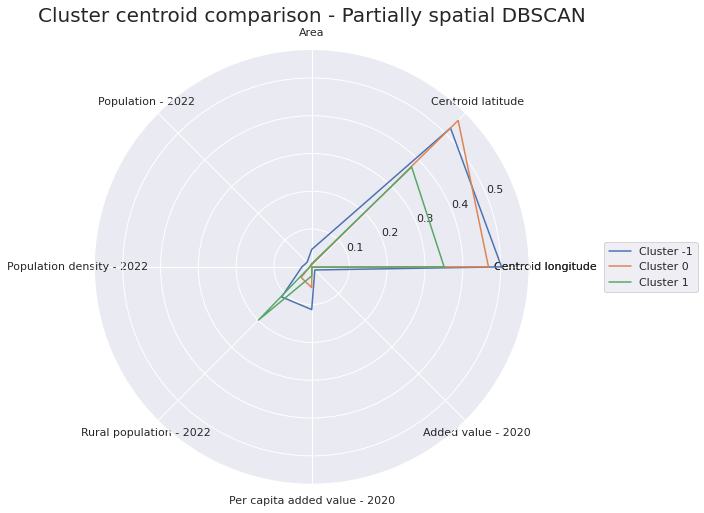

In [134]:
df_dbscan_part = mun_geo_merged_clean_name_control[part_spatial].copy()
df_dbscan_part['part_spatial_dbscan'] = dbsc_part.labels_
df_dbscan_centroid_part = df_dbscan_part.groupby('part_spatial_dbscan').mean()
# drop the outlier
#df_dbscan_centroid1.drop(-1, inplace=True)
# df_dbscan_centroid.reset_index()
radar_plot_cluster_centroids('Partially spatial DBSCAN',df_dbscan_centroid_part)

In [135]:
df_dbscan_centroid_part

,Centroid longitude,Centroid latitude,Area,Population - 2022,Population density - 2022,Rural population - 2022,Per capita added value - 2020,Added value - 2020
part_spatial_dbscan,,,,,,,,
-1,0.502341,0.519604,0.045987,0.017151,0.025757,0.112631,0.113064,0.011643
0,0.467848,0.548080,0.005334,0.002000,0.004649,0.039724,0.054827,0.000765
1,0.350445,0.373963,0.008126,0.005258,0.004894,0.199201,0.024103,0.001152


In [136]:
#Silhouette Score
metrics.silhouette_score(mun_geo_merged_clean_name_control[part_spatial], dbsc_part.labels_)

0.09566166100564416

In [137]:
# The overlapping of clusters increased dramatically as it is shown in the radar plot and the silhouette score with a value close to zero.

#### Kmeans

In [138]:
# To prevent randomness in kmeans, the n_init is set to 50.

In [139]:
k_cluster = 4
random_seed = 1
kmeans_method_part_spatial = KMeans(n_clusters=k_cluster,random_state=random_seed, n_init=50)
kmeans_method_part_spatial.fit(mun_geo_merged_clean_name[part_spatial])

KMeans(n_clusters=4, n_init=50, random_state=1)

In [140]:
mun_geo_merged_clean_name['part_spatial_kmeans'] = kmeans_method_part_spatial.labels_

**Clustering comparasion**

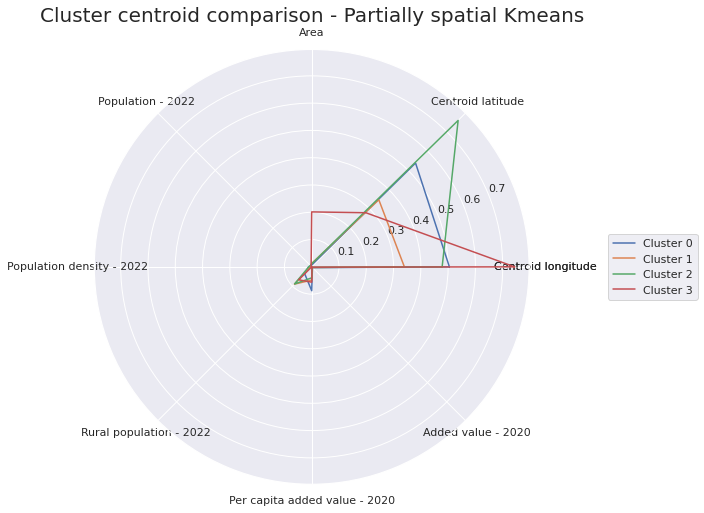

In [141]:
df_kmeans_part_spatial = mun_geo_merged_clean_name_control[part_spatial].copy()
df_kmeans_part_spatial['part_spatial_kmeans'] = kmeans_method_part_spatial.labels_
df_kmeans_part_spatial_centroid = df_kmeans_part_spatial.groupby('part_spatial_kmeans').mean()
# drop the outlier
#df_kmeans_non_spatial_centroid.drop(-1, inplace=True)
# df_dbscan_centroid.reset_index()
radar_plot_cluster_centroids('Partially spatial Kmeans',df_kmeans_part_spatial_centroid)

In [142]:
df_kmeans_part_spatial_centroid

,Centroid longitude,Centroid latitude,Area,Population - 2022,Population density - 2022,Rural population - 2022,Per capita added value - 2020,Added value - 2020
part_spatial_kmeans,,,,,,,,
0,0.504640,0.538238,0.006600,0.005173,0.011414,0.036148,0.087431,0.003900
1,0.339685,0.347820,0.012362,0.006133,0.005689,0.089443,0.048572,0.003078
2,0.478057,0.758969,0.011242,0.007280,0.010873,0.088716,0.040214,0.002812
3,0.743745,0.280540,0.201439,0.002985,0.000093,0.067156,0.056157,0.001551


In [143]:
metrics.silhouette_score(mun_geo_merged_clean_name_control[part_spatial], kmeans_method_part_spatial.labels_)

0.35982689800502854

In [144]:
# Partially spatial kmeans is performing better than partially spatial DBSCAN, however the silhouette score is close to 0, this is a neutral result in terms of the quality of the clustering.

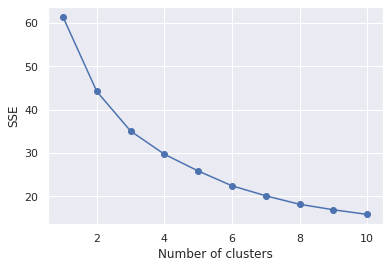

In [145]:
# calculate SSE for a range of number of cluster
list_SSE_part = []
min_k = 1
max_k = 10
range_k = range(min_k, max_k+1)
for i in range_k:
    km_part = KMeans(
        n_clusters=i, init='random',
        n_init=50, max_iter=300,
        tol=1e-04, random_state=1
    )
    km_part.fit(mun_geo_merged_clean_name[part_spatial])
    # inertia is a concept from physics. Roughly it means SSE of clustering.
    list_SSE_part.append(km_part.inertia_)

# plot
plt.plot(range_k, list_SSE_part, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [146]:
# It seemed that the ideal number of clusters in the partially spatial DBSCAN analysis is 3, based on the previous elbow method analysis.

##### Reviewed

In [147]:
k_cluster = 3
random_seed = 1
kmeans_method_part_spatial_re = KMeans(n_clusters=k_cluster,random_state=random_seed, n_init=50)
kmeans_method_part_spatial_re.fit(mun_geo_merged_clean_name[part_spatial])

KMeans(n_clusters=3, n_init=50, random_state=1)

In [148]:
mun_geo_merged_clean_name['part_spatial_kmeans_re'] = kmeans_method_part_spatial_re.labels_

**Clustering comparasion**

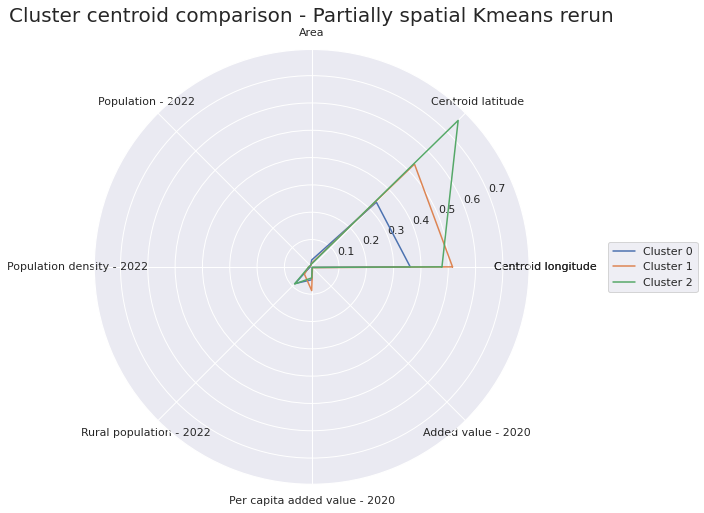

In [149]:
df_kmeans_part_spatial_re = mun_geo_merged_clean_name_control[part_spatial].copy()
df_kmeans_part_spatial_re['part_spatial_kmeans_re'] = kmeans_method_part_spatial_re.labels_
df_kmeans_part_spatial_re_centroid = df_kmeans_part_spatial_re.groupby('part_spatial_kmeans_re').mean()
# drop the outlier
#df_kmeans_non_spatial_centroid.drop(-1, inplace=True)
# df_dbscan_centroid.reset_index()
radar_plot_cluster_centroids('Partially spatial Kmeans rerun',df_kmeans_part_spatial_re_centroid)

In [150]:
df_kmeans_part_spatial_re_centroid

,Centroid longitude,Centroid latitude,Area,Population - 2022,Population density - 2022,Rural population - 2022,Per capita added value - 2020,Added value - 2020
part_spatial_kmeans_re,,,,,,,,
0,0.360671,0.334780,0.025050,0.005590,0.005230,0.086395,0.047273,0.002762
1,0.515511,0.532092,0.013311,0.005235,0.011168,0.037683,0.086982,0.003899
2,0.476818,0.758258,0.011403,0.007212,0.010544,0.088821,0.040346,0.002798


In [151]:
metrics.silhouette_score(mun_geo_merged_clean_name_control[part_spatial], kmeans_method_part_spatial_re.labels_)

0.33760683167109146

In [152]:
# When having 3 clusters in the partially kmeans clustering, the silhouette score slightly decreased.

#### Hierarchical clustering

In [153]:
agg_cluster_part = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(mun_geo_merged_clean_name_control[part_spatial])

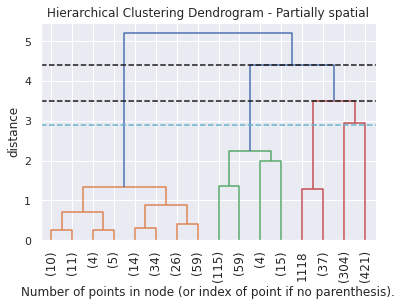

In [154]:
ax = plt.gca()
plt.title("Hierarchical Clustering Dendrogram - Partially spatial")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_cluster_part, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel('distance')
plt.hlines(4.4, ax.get_xlim()[0], ax.get_xlim()[1], linestyle='dashed', color='k')
plt.hlines(3.5, ax.get_xlim()[0], ax.get_xlim()[1], linestyle='dashed', color='k')
plt.hlines(2.9, ax.get_xlim()[0], ax.get_xlim()[1], linestyle='dashed', color='c')
plt.show()

In [155]:
# The distance between 3 and 4 clusters, is greater than the distacne between the 4 and 5 clusters. This indicates that it is preferable to keep the 4 clusters, instead of 5.

In [156]:
# Storing clusters lablel
mun_geo_merged_clean_name['part_spatial_hierarchical'] = agg_cluster_part.labels_

##### Reviewed

In [157]:
agg_cluster_part_re = AgglomerativeClustering(distance_threshold=None, n_clusters=4).fit(mun_geo_merged_clean_name_control[part_spatial])

In [158]:
# Storing re cluster labels
mun_geo_merged_clean_name['part_spatial_hierarchical_4'] = agg_cluster_part_re.labels_

In [159]:
# Silhouette score
metrics.silhouette_score(mun_geo_merged_clean_name_control[part_spatial], agg_cluster_part_re.labels_)

0.3539440079084648

### Spatial clustering - Max-p method

For the spatial clustering, the max-p method with be used with variations in the threshold variable and the threshold values. Population and number of municipalities will be threshold variables, each on with 3 different threshold value.

In [160]:
# Non spatial variables
non_spatial

['Area',
 'Population - 2022',
 'Population density - 2022',
 'Rural population - 2022',
 'Per capita added value - 2020',
 'Added value - 2020']

In [161]:
# Non spatial variables to be considered in the spatial clustering
attrs_name = non_spatial

In [162]:
%%time
# Caluclate the spatial weight object
w = libpysal.weights.Queen.from_dataframe(mun_geo_merged_clean_name)

CPU times: user 38.9 s, sys: 1.16 s, total: 40 s
Wall time: 40 s


#### Population threshold

##### Case 1

In the case 1, the population threshold will be 100.000 people, expressed in terms of the maximum population.

In [163]:
# Maximum popupation unscaled value
unscaled_max_pop= 7901653.0

In [164]:
# Threshols based on a minimum population value of 100000, in terms of maximum population value
threshold_100k_pop = 100000/unscaled_max_pop
print(threshold_100k_pop)

0.012655579788178498


In [165]:
# Scaled 2022 Population variable
threshold_name_pop = 'Population - 2022'

In [166]:
%%time
RANDOM_SEED = 123456
np.random.seed(RANDOM_SEED)
model_max_p_pop_1 = MaxP(mun_geo_merged_clean_name, w, attrs_name, threshold_name_pop, threshold_100k_pop, top_n=3)
model_max_p_pop_1.solve()

CPU times: user 1min 28s, sys: 0 ns, total: 1min 28s
Wall time: 1min 28s


In [167]:
mun_geo_merged_clean_name['spatial_max_p_pop_1'] = model_max_p_pop_1.labels_

In [168]:
#Number of regions
model_max_p_pop_1.p

194

In [169]:
mun_geo_merged_clean_name[['spatial_max_p_pop_1','MPIO_CDPMP']].groupby('spatial_max_p_pop_1').count().sort_values(by='MPIO_CDPMP',ascending=False)

,MPIO_CDPMP
spatial_max_p_pop_1,
71,24
34,19
21,16
50,16
19,15
...,...
53,1
102,1
175,1


array([[<AxesSubplot:title={'center':'MPIO_CDPMP'}>]], dtype=object)

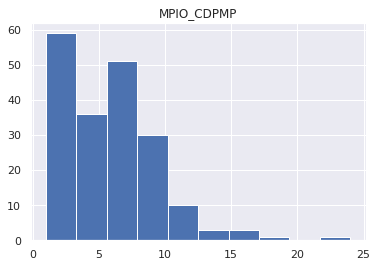

In [170]:
# Histogram of Clustered municipalities
mun_geo_merged_clean_name[['spatial_max_p_pop_1','MPIO_CDPMP']].groupby('spatial_max_p_pop_1').count().hist()

In [171]:
# Descriptive statistics of Clustered municipalities
mun_geo_merged_clean_name[['spatial_max_p_pop_1','MPIO_CDPMP']].groupby('spatial_max_p_pop_1').count().describe().T

,count,mean,std,min,25%,50%,75%,max
MPIO_CDPMP,194.0,5.768041,3.633866,1.0,3.0,6.0,7.0,24.0


<AxesSubplot:>

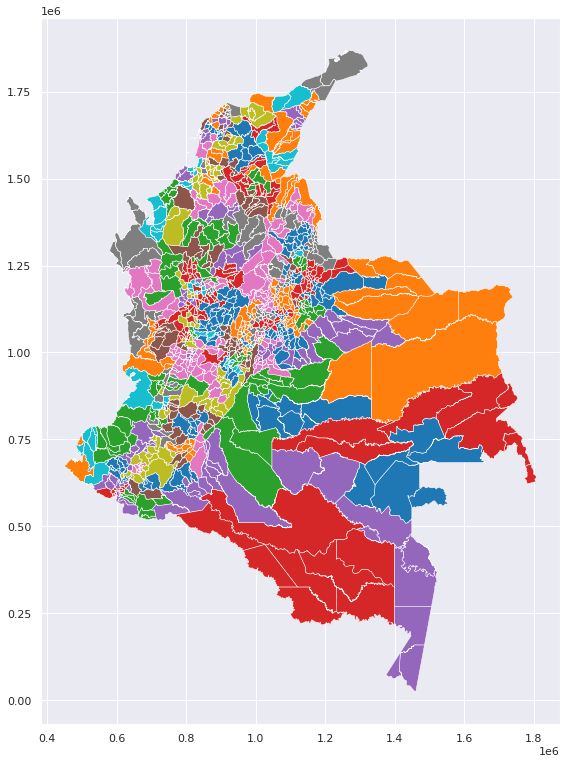

In [172]:
mun_geo_merged_clean_name.plot(column='spatial_max_p_pop_1', categorical=True, figsize=(12,13),linewidth=0.5)

In [173]:
# Adjust
# mun_geo_merged_clean_name[mun_geo_merged_clean_name.spatial_max_p_single==]

In [174]:
#set(model_max_p_single.labels_)

##### Case 2

In the case 2, the population threshold will be 500.000 people, expressed in terms of the maximum population.

In [175]:
threshold_500k_pop = 500000/unscaled_max_pop
print(threshold_500k_pop)

0.06327789894089249


In [ ]:
%%time
RANDOM_SEED = 123456
np.random.seed(RANDOM_SEED)
model_max_p_pop_2 = MaxP(mun_geo_merged_clean_name, w, attrs_name, threshold_name_pop, threshold_500k_pop, top_n=3)
model_max_p_pop_2.solve()

In [ ]:
mun_geo_merged_clean_name['spatial_max_p_pop_2'] = model_max_p_pop_2.labels_

In [ ]:
#Number of regions
model_max_p_pop_2.p

In [ ]:
mun_geo_merged_clean_name[['spatial_max_p_pop_2','MPIO_CDPMP']].groupby('spatial_max_p_pop_2').count().sort_values(by='MPIO_CDPMP',ascending=False)

In [ ]:
# Histogram of Clustered municipalities
mun_geo_merged_clean_name[['spatial_max_p_pop_2','MPIO_CDPMP']].groupby('spatial_max_p_pop_2').count().hist()

In [ ]:
# Descriptive statistics of Clustered municipalities
mun_geo_merged_clean_name[['spatial_max_p_pop_2','MPIO_CDPMP']].groupby('spatial_max_p_pop_2').count().describe().T

In [ ]:
mun_geo_merged_clean_name.plot(column='spatial_max_p_pop_2', categorical=True, figsize=(12,13),linewidth=0.5)

In [ ]:
# Adjust
# mun_geo_merged_clean_name[mun_geo_merged_clean_name.spatial_max_p_single==]

In [ ]:
#set(model_max_p_single.labels_)

##### Case 3

In the case 3, the population threshold will be 1 million people, expressed in terms of the maximum population.

In [ ]:
threshold_1000k_pop = 1000000/unscaled_max_pop
print(threshold_1000k_pop)

In [ ]:
%%time
RANDOM_SEED = 123456
np.random.seed(RANDOM_SEED)
model_max_p_pop_3 = MaxP(mun_geo_merged_clean_name, w, attrs_name, threshold_name_pop, threshold_1000k_pop, top_n=3)
model_max_p_pop_3.solve()

In [ ]:
mun_geo_merged_clean_name['spatial_max_p_pop_3'] = model_max_p_pop_3.labels_

In [ ]:
#Number of regions
model_max_p_pop_3.p

In [ ]:
mun_geo_merged_clean_name[['spatial_max_p_pop_3','MPIO_CDPMP']].groupby('spatial_max_p_pop_3').count().sort_values(by='MPIO_CDPMP',ascending=False)

In [ ]:
# Histogram of Clustered municipalities
mun_geo_merged_clean_name[['spatial_max_p_pop_3','MPIO_CDPMP']].groupby('spatial_max_p_pop_3').count().hist()

In [ ]:
# Descriptive statistics of Clustered municipalities
mun_geo_merged_clean_name[['spatial_max_p_pop_3','MPIO_CDPMP']].groupby('spatial_max_p_pop_3').count().describe().T

In [ ]:
mun_geo_merged_clean_name.plot(column='spatial_max_p_pop_3', categorical=True, figsize=(12,13),linewidth=0.5)

#### Municipality threshold

##### Case 1

In the case 1, the number of municipalities threshold will be 5.

In [ ]:
threshold_5_mun = 5

In [ ]:
mun_geo_merged_clean_name['count'] = 1

In [ ]:
threshold_name_mun = 'count'

In [ ]:
%%time
RANDOM_SEED = 123456
np.random.seed(RANDOM_SEED)
model_max_p_mun_1 = MaxP(mun_geo_merged_clean_name, w, attrs_name, threshold_name_mun, threshold_5_mun, top_n=3)
model_max_p_mun_1.solve()

In [ ]:
mun_geo_merged_clean_name['spatial_max_p_mun_1'] = model_max_p_mun_1.labels_

In [ ]:
#Number of regions
model_max_p_mun_1.p

In [ ]:
mun_geo_merged_clean_name[['spatial_max_p_mun_1','MPIO_CDPMP']].groupby('spatial_max_p_mun_1').count().sort_values(by='MPIO_CDPMP',ascending=False)

In [ ]:
# Histogram of Clustered municipalities
mun_geo_merged_clean_name[['spatial_max_p_mun_1','MPIO_CDPMP']].groupby('spatial_max_p_mun_1').count().hist()

In [ ]:
# Descriptive statistics of Clustered municipalities
mun_geo_merged_clean_name[['spatial_max_p_mun_1','MPIO_CDPMP']].groupby('spatial_max_p_mun_1').count().describe().T

In [ ]:
mun_geo_merged_clean_name.plot(column='spatial_max_p_mun_1', categorical=True, figsize=(12,13), cmap='Paired',linewidth=0.5)

##### Case 2

In [ ]:
threshold_15_mun = 15

In the case 2, the number of municipalities threshold will be 15.

In [ ]:
%%time
RANDOM_SEED = 123456
np.random.seed(RANDOM_SEED)
model_max_p_mun_2 = MaxP(mun_geo_merged_clean_name, w, attrs_name, threshold_name_mun, threshold_15_mun, top_n=3)
model_max_p_mun_2.solve()

In [ ]:
mun_geo_merged_clean_name['spatial_max_p_mun_2'] = model_max_p_mun_2.labels_

In [ ]:
#Number of regions
model_max_p_mun_2.p

In [ ]:
mun_geo_merged_clean_name[['spatial_max_p_mun_2','MPIO_CDPMP']].groupby('spatial_max_p_mun_2').count().sort_values(by='MPIO_CDPMP',ascending=False)

In [ ]:
# Histogram of Clustered municipalities
mun_geo_merged_clean_name[['spatial_max_p_mun_2','MPIO_CDPMP']].groupby('spatial_max_p_mun_2').count().hist()

In [ ]:
# Descriptive statistics of Clustered municipalities
mun_geo_merged_clean_name[['spatial_max_p_mun_2','MPIO_CDPMP']].groupby('spatial_max_p_mun_2').count().describe().T

In [ ]:
mun_geo_merged_clean_name.plot(column='spatial_max_p_mun_2', categorical=True, figsize=(12,13), cmap='Paired',linewidth=0.5)

##### Case 3

In [ ]:
In the case 3, the number of municipalities threshold will be 25.

In [ ]:
threshold_25_mun = 25

In [ ]:
%%time
RANDOM_SEED = 123456
np.random.seed(RANDOM_SEED)
model_max_p_mun_3 = MaxP(mun_geo_merged_clean_name, w, attrs_name, threshold_name_mun, threshold_25_mun, top_n=3)
model_max_p_mun_3.solve()

In [ ]:
mun_geo_merged_clean_name['spatial_max_p_mun_3'] = model_max_p_mun_3.labels_

In [ ]:
#Number of regions
model_max_p_mun_3.p

In [ ]:
mun_geo_merged_clean_name[['spatial_max_p_mun_3','MPIO_CDPMP']].groupby('spatial_max_p_mun_3').count().sort_values(by='MPIO_CDPMP',ascending=False)

In [ ]:
# Histogram of Clustered municipalities
mun_geo_merged_clean_name[['spatial_max_p_mun_3','MPIO_CDPMP']].groupby('spatial_max_p_mun_3').count().hist()

In [ ]:
# Descriptive statistics of Clustered municipalities
mun_geo_merged_clean_name[['spatial_max_p_mun_3','MPIO_CDPMP']].groupby('spatial_max_p_mun_3').count().describe().T

In [ ]:
mun_geo_merged_clean_name.plot(column='spatial_max_p_mun_3', categorical=True, figsize=(12,13),linewidth=0.5)

## Results

### Partially and non spatial clustering

In [ ]:
# Create dictionaty with the results variables of interest
results = {'Method': ['DBSCAN', 'DBSCAN', 'Kmeans', 'Kmeans','Hierarchical clustering', 'Hierarchical clustering'],
          'Type': ['Non spatial', 'Partially spatial','Non spatial', 'Partially spatial','Non spatial', 'Partially spatial']}


df_results = pd.DataFrame(results)

method = ['non_spatial_dbscan','part_spatial_dbscan','non_spatial_kmeans_re','part_spatial_kmeans_re','non_spatial_hierarchical_4','part_spatial_hierarchical_4']

num_clusters = []
mun_mean = []
mun_min = []
mun_max = []


for m in method:
    n_clusters = len(mun_geo_merged_clean_name[m].unique())
    m_mean = mun_geo_merged_clean_name.groupby(m)['MPIO_CDPMP'].count().mean()
    m_min = mun_geo_merged_clean_name.groupby(m)['MPIO_CDPMP'].count().min()
    m_max = mun_geo_merged_clean_name.groupby(m)['MPIO_CDPMP'].count().max()
    
    num_clusters.append(n_clusters)
    mun_mean.append(m_mean)
    mun_min.append(m_min)
    mun_max.append(m_max)

# add the results to a new column of the DataFrame
df_results['Number of clusters'] = num_clusters
df_results['Municipalities mean'] = mun_mean
df_results['Municipalities minimum'] = mun_min
df_results['Municipalities maximum'] = mun_max

df_results['Silhouette score'] = [metrics.silhouette_score(mun_geo_merged_clean_name_control[non_spatial], dbsc_non.labels_),
                                 metrics.silhouette_score(mun_geo_merged_clean_name_control[part_spatial], dbsc_part.labels_),
                                 metrics.silhouette_score(mun_geo_merged_clean_name_control[non_spatial], kmeans_method_non_spatial_re.labels_),
                                 metrics.silhouette_score(mun_geo_merged_clean_name_control[part_spatial], kmeans_method_part_spatial_re.labels_),
                                 metrics.silhouette_score(mun_geo_merged_clean_name_control[non_spatial], agg_cluster_non_re.labels_),
                                 metrics.silhouette_score(mun_geo_merged_clean_name_control[part_spatial], agg_cluster_part_re.labels_)]
df_results

#### DBSCAN Clustering

In [ ]:
fig, [ax1,ax2,ax3] = plt.subplots(1, 3, sharey=False, tight_layout=True,figsize=(16, 6),linewidth=0.5)
plt.suptitle("DBSCAN clustering",fontsize=22)

# Clustering results
mun_geo_merged_clean_name.plot(column='DPTO_CCDGO', categorical=True,linewidth=0.5,ax=ax1)
mun_geo_merged_clean_name.plot(column='non_spatial_dbscan', categorical=True,linewidth=0.5,ax=ax2)
mun_geo_merged_clean_name.plot(column='part_spatial_dbscan', categorical=True,linewidth=0.5,ax=ax3)

# Titles
ax1.set_title("Current clusters",fontsize=18)
ax2.set_title("Non spatial",fontsize=18)
ax3.set_title("Part spatial",fontsize=18)

# Setting off axis ticks
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])
ax1.set_yticklabels([])
ax2.set_yticklabels([])
ax3.set_yticklabels([])

# X axis labels
ax1.set_xlabel("K = "+ str(len(mun_geo_merged_clean_name['DPTO_CCDGO'].unique())),fontsize=18)
ax2.set_xlabel("K = "+ str(df_results['Number of clusters'][0]),fontsize=18)
ax3.set_xlabel("K = "+ str(df_results['Number of clusters'][1]),fontsize=18)

plt.savefig('Results_DBSCAN.jpg',dpi=300,bbox_inches='tight')

#### Kmeans Clustering

In [ ]:
fig, [ax1,ax2,ax3] = plt.subplots(1, 3, sharey=False, tight_layout=True,figsize=(16, 6),linewidth=0.5)
plt.suptitle("Kmeans clustering",fontsize=22)

# Clustering results
mun_geo_merged_clean_name.plot(column='DPTO_CCDGO', categorical=True,linewidth=0.5,ax=ax1)
mun_geo_merged_clean_name.plot(column='non_spatial_kmeans_re', categorical=True,linewidth=0.5,ax=ax2)
mun_geo_merged_clean_name.plot(column='part_spatial_kmeans_re', categorical=True,linewidth=0.5,ax=ax3)

# Titles
ax1.set_title("Current clusters",fontsize=18)
ax2.set_title("Non spatial",fontsize=18)
ax3.set_title("Part spatial",fontsize=18)

# Setting off axis ticks
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])
ax1.set_yticklabels([])
ax2.set_yticklabels([])
ax3.set_yticklabels([])

# X axis labels
ax1.set_xlabel("K = "+ str(len(mun_geo_merged_clean_name['DPTO_CCDGO'].unique())),fontsize=18)
ax2.set_xlabel("K = "+ str(df_results['Number of clusters'][2]),fontsize=18)
ax3.set_xlabel("K = "+ str(df_results['Number of clusters'][3]),fontsize=18)

plt.savefig('Results_Kmeans.jpg',dpi=300,bbox_inches='tight')

#### Hierarchical clustering

In [ ]:
fig, [ax1,ax2,ax3] = plt.subplots(1, 3, sharey=False, tight_layout=True,figsize=(16, 6),linewidth=0.5)
plt.suptitle("Hierarchical clustering",fontsize=22)

# Clustering results
mun_geo_merged_clean_name.plot(column='DPTO_CCDGO', categorical=True,linewidth=0.5,ax=ax1)
mun_geo_merged_clean_name.plot(column='non_spatial_hierarchical_4', categorical=True,linewidth=0.5,ax=ax2)
mun_geo_merged_clean_name.plot(column='part_spatial_hierarchical_4', categorical=True,linewidth=0.5,ax=ax3)

# Titles
ax1.set_title("Current clusters",fontsize=18)
ax2.set_title("Non spatial",fontsize=18)
ax3.set_title("Part spatial",fontsize=18)

# Setting off axis ticks
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])
ax1.set_yticklabels([])
ax2.set_yticklabels([])
ax3.set_yticklabels([])

# X axis labels
ax1.set_xlabel("K = "+ str(len(mun_geo_merged_clean_name['DPTO_CCDGO'].unique())),fontsize=18)
ax2.set_xlabel("K = "+ str(df_results['Number of clusters'][4]),fontsize=18)
ax3.set_xlabel("K = "+ str(df_results['Number of clusters'][5]),fontsize=18)

plt.savefig('Results_Hierarchical.jpg',dpi=300,bbox_inches='tight')

Geographically and when compared to the current state municipality division, it is possible to tell visually how the inclusion of the latitude and the longitude result in more cohesive and even municipalities clusters, although total regional cohesion was not achieved in general terms, as expected. A case that was close to total regional cohesion was the partially spatial kmeans, which resulted in 3 clusters across the country. 

### Spatial clustering

As in the non and partially spatial cases, the path silhouette score provide a base line reference, for how well do the current state division fits as clusters when considering the variables for ineptest and the spatial structure of the vision (Geosilhouettes: geographical measures of cluster fit — esda v2.4.3 Manual, 2023).

In [ ]:
esda.path_silhouette(mun_geo_merged_clean_name[non_spatial].values,mun_geo_merged_clean_name['DPTO_CCDGO'], w).mean()

In [ ]:
# Create dictionaty with the results variables of interest
spatial_results = {'Variaple threshold': [threshold_name_pop, threshold_name_pop, threshold_name_pop, 'Number of municipalities','Number of municipalities', 'Number of municipalities'],
          'Threshold value': [100000, 500000,1000000, threshold_5_mun,threshold_15_mun, threshold_25_mun]}

df_spatial_results = pd.DataFrame(spatial_results)
df_silhouette = pd.DataFrame()
# Adjust
spatial_method = ['spatial_max_p_pop_1','spatial_max_p_pop_2','spatial_max_p_pop_3','spatial_max_p_mun_1','spatial_max_p_mun_2','spatial_max_p_mun_3']

s_num_clusters = []
s_mun_mean = []
s_mun_min = []
s_mun_max = []
p_silhouette = []


for m in spatial_method:
    s_n_clusters = len(mun_geo_merged_clean_name[m].unique())
    s_m_mean = mun_geo_merged_clean_name.groupby(m)['MPIO_CDPMP'].count().mean()
    s_m_min = mun_geo_merged_clean_name.groupby(m)['MPIO_CDPMP'].count().min()
    s_m_max = mun_geo_merged_clean_name.groupby(m)['MPIO_CDPMP'].count().max()
    df_silhouette[m] = esda.path_silhouette(mun_geo_merged_clean_name[non_spatial].values,mun_geo_merged_clean_name[m], w)
    mean_p_sil_score = esda.path_silhouette(mun_geo_merged_clean_name[non_spatial].values,mun_geo_merged_clean_name[m], w).mean()
    
    s_num_clusters.append(s_n_clusters)
    s_mun_mean.append(s_m_mean)
    s_mun_min.append(s_m_min)
    s_mun_max.append(s_m_max)
    p_silhouette.append(mean_p_sil_score)

# add the results to a new column of the DataFrame
df_spatial_results['Number of clusters'] = s_num_clusters
df_spatial_results['Municipalities mean'] = s_mun_mean
df_spatial_results['Municipalities minimum'] = s_mun_min
df_spatial_results['Municipalities maximum'] = s_mun_max
df_spatial_results['Mean path silhouette score'] = p_silhouette


df_spatial_results

#### Population threshold

In [ ]:
# Ploting population threshold results
fig, [ax1,ax2,ax3,ax4] = plt.subplots(1, 4, sharey=False, tight_layout=True,figsize=(16, 6),linewidth=0.5)
plt.suptitle("Population thershold clustering",fontsize=22)

# Clustering results
mun_geo_merged_clean_name.plot(column='DPTO_CCDGO', categorical=True,linewidth=0.5,ax=ax1)
mun_geo_merged_clean_name.plot(column='spatial_max_p_pop_1', categorical=True,linewidth=0.5,ax=ax2)
mun_geo_merged_clean_name.plot(column='spatial_max_p_pop_2', categorical=True,linewidth=0.5,ax=ax3)
mun_geo_merged_clean_name.plot(column='spatial_max_p_pop_3', categorical=True,linewidth=0.5,ax=ax4)

# Titles
ax1.set_title("Current clusters",fontsize=18)
ax2.set_title("Population = 100K",fontsize=18)
ax3.set_title("Population = 500K",fontsize=18)
ax4.set_title("Population = 1M",fontsize=18)

# Setting off axis ticks
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])
ax4.set_xticklabels([])
ax1.set_yticklabels([])
ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax4.set_yticklabels([])

# X axis labels
ax1.set_xlabel("K = "+ str(len(mun_geo_merged_clean_name['DPTO_CCDGO'].unique())),fontsize=18)
ax2.set_xlabel("K = "+ str(df_spatial_results['Number of clusters'][0]),fontsize=18)
ax3.set_xlabel("K = "+ str(df_spatial_results['Number of clusters'][1]),fontsize=18)
ax4.set_xlabel("K = "+ str(df_spatial_results['Number of clusters'][2]),fontsize=18)

plt.savefig('Results_Spatial_Population.jpg',dpi=300,bbox_inches='tight')

#### Municilities threshold

In [ ]:
# Ploting municipality threshold results
fig, [ax1,ax2,ax3,ax4] = plt.subplots(1, 4, sharey=False, tight_layout=True,figsize=(16, 6),linewidth=0.5)
plt.suptitle("Municipality thershold clustering",fontsize=22)

# Clustering results
mun_geo_merged_clean_name.plot(column='DPTO_CCDGO', categorical=True,linewidth=0.5,ax=ax1)
mun_geo_merged_clean_name.plot(column='spatial_max_p_mun_1', categorical=True,linewidth=0.5,ax=ax2)
mun_geo_merged_clean_name.plot(column='spatial_max_p_mun_2', categorical=True,linewidth=0.5,ax=ax3)
mun_geo_merged_clean_name.plot(column='spatial_max_p_mun_3', categorical=True,linewidth=0.5,ax=ax4)

# Titles
ax1.set_title("Current clusters",fontsize=18)
ax2.set_title("Mun = 5",fontsize=18)
ax3.set_title("Mun = 15",fontsize=18)
ax4.set_title("Mun = 25",fontsize=18)

# Setting off axis ticks
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])
ax4.set_xticklabels([])
ax1.set_yticklabels([])
ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax4.set_yticklabels([])

# X axis labels
ax1.set_xlabel("K = "+ str(len(mun_geo_merged_clean_name['DPTO_CCDGO'].unique())),fontsize=18)
ax2.set_xlabel("K = "+ str(df_spatial_results['Number of clusters'][3]),fontsize=18)
ax3.set_xlabel("K = "+ str(df_spatial_results['Number of clusters'][4]),fontsize=18)
ax4.set_xlabel("K = "+ str(df_spatial_results['Number of clusters'][5]),fontsize=18)

plt.savefig('Results_Spatial_Municipality.jpg',dpi=300,bbox_inches='tight')

Finally, when the spatial data and structure is fully considered in the clustering exercises, the result reflect a more feasible as the threshold value increases both in the population and number of municipalities case, as the threshold values increase. Although is a minor increase, both cases with the highest threshold values in the spatial clustering have the higher mean path silhouette scores. In the case of the population case, the silhouette score with the highest threshold, exceeded the base line silhouette score of the current department division.


These scenarios resulted in 34 and 40 clusters, for the highest threshold values in populations and numbers of municipalities, respectively. If the resulting number of clusters are compared to the current number of state municipalities division, there are not far from the current value, which is 33 departments.



#### Silhouette scores

In [ ]:
df_silhouette_clean_name = df_silhouette.rename(columns={spatial_method[0]: 'Population threshold - 100K',
                                                         spatial_method[1]: 'Population threshold - 500K',
                                                spatial_method[2]:'Population threshold - 1M',
                                                spatial_method[3]:'Municipality threshold - 5',
                                                spatial_method[4]:'Municipality threshold - 15',
                                                spatial_method[5]: 'Municipality threshold - 25'})
df_silhouette_clean_name.head()

In [ ]:
df_silhouette_clean_name_hist = df_silhouette_clean_name.hist(figsize = (20,10),bins=75)
plt.suptitle('Histograms path silhouette score')
#ax.set_title("test")
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

The previous histograms reflect consistently the silhouette score for every spatial observation in each variation of variable and threshold value.

## Discussion

The non, partially and spatial clustering successfully allow to assess statistically and geographically alternative the state municipality. As more spatial data was incorporated in the analysis, more location feasible and cohesively clusters were achieved. As a quantitative methos for grouping observations that have a strong relationship with their location and surrounding spatial structure, the method selected successfully provide with valuable outputs.


As possible limitations ins sight, the research identifies the followings elements: First, the methods are computational expensive when including spatial data specially with large numbers of spatial observations. Second, possibly biased variable selection. As removing outliers would endanger the purpose of the research, these observations might bring noise that could compromise the quality of the results (e.g.: urban or rural variable).


## Conclusion

Regarding the research question, there is a specific case that achieved superior results compared to the current department municipalities division. Although it is a minor improvement, the spatial clustering exercise registered a slightly higher average path silhouette soccer that the current department division with the subset of variables of interest selected (current cluster: 0.043, new cluster: 0.066). 

Hence, it is possible to state that with a 1 million people threshold value, a spatial clustering exercise could result in a more cohesive department municipality division.

## References

Andrés, F., Arteaga, N., Arteaga, G., Llinás, D., Andrés, M., Jorge, A., Rueda-Gallardo, J., and Villamil. (2015). ‘Definición de Categorías de Ruralidad [Definition of Rurality Categories]’. Archivos de Economía.

Chen, H. (2023). ‘Week 10 Practical - DSSS’. Available at: https://github.com/huanfachen/DSSS/blob/bab4b40dc51ec763c6d45ccc28b6c05af1d31760/Week_10/Practical-10.ipynb (Accessed: 24 April 2023).

DANE. (2021). Geoportal DANE - Descarga del Marco Geoestadistico Nacional (MGN) [DANE Geoportal - Download the National Geostatistical Framework (MGN)]. Available at: https://geoportal.dane.gov.co/servicios/descarga-y-metadatos/descarga-mgn-marco-geoestadistico-nacional/ (Accessed: 23 April 2023).

Duranton, G. (2015). ‘Roads and trade in Colombia’. Economics of Transportation. (Special Issue on Collective Contributions in the Honor of Richard Arnott), 4 (1), pp. 16–36. doi: 10.1016/j.ecotra.2014.11.003.

Gáfaro, M. and Pellegrina, H. S. (2022). ‘Trade, farmers’ heterogeneity, and agricultural productivity: Evidence from Colombia’. Journal of International Economics, 137, p. 103598. doi: 10.1016/j.jinteco.2022.103598.

Geosilhouettes: geographical measures of cluster fit — esda v2.4.3 Manual. (2023). Available at: https://pysal.org/esda/notebooks/geosilhouettes.html (Accessed: 22 April 2023).

Radečić, D. (2022). How to Make Stunning Radar Charts with Python — Implemented in Matplotlib and Plotly. Medium. Available at: https://towardsdatascience.com/how-to-make-stunning-radar-charts-with-python-implemented-in-matplotlib-and-plotly-91e21801d8ca (Accessed: 24 April 2023).

Reades, J. (2023). jreades - Github. GitHub. Available at: https://github.com/jreades (Accessed: 24 April 2023).
Sanchez, C. C., González, D. S. and Villamil, I. O. (2015). ‘Tipologías Departamentales y Municipales: una propuesta para comprender las entidades territoriales colombianas [Departmental and Municipal Typologies: a proposal to understand Colombian territorial entities]’. Available at: https://colaboracion.dnp.gov.co/CDT/Estudios%20Econmicos/2015may28%20Tipologias.pdf (Accessed: 3 April 2023).

Sánchez, F. and Núñez’, J. (2000). ‘Geography and Economic Development: A Municipal Approach for Colombia’.

sklearn.cluster.DBSCAN. (2023). scikit-learn. Available at: https://scikit-learn/stable/modules/generated/sklearn.cluster.DBSCAN.html (Accessed: 24 April 2023).

sklearn.metrics.silhouette_score. (2023). scikit-learn. Available at: https://scikit-learn/stable/modules/generated/sklearn.metrics.silhouette_score.html (Accessed: 24 April 2023).

sklearn.preprocessing.MinMaxScaler. (2023). scikit-learn. Available at: https://scikit-learn/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html (Accessed: 24 April 2023).

Tobler, W. R. (1970). ‘A Computer Movie Simulating Urban Growth in the Detroit Region’. Economic Geography. Routledge, 46 (sup1), pp. 234–240. doi: 10.2307/143141.




In [ ]:
print('Complete run time: ' + str((timeit.default_timer() - start_time)/60)+' minutes.')